In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, accuracy_score

First, we'll import the spotify dataset to clean the data and conduct EDA.

In [4]:
data = pd.read_csv('taylor_swift_spotify.csv')
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289


In [5]:
# Data cleaning
data["release_date"] = pd.to_datetime(data["release_date"])
data["year"] = data["release_date"].dt.year

# There are many versions of each album. For this part of our analysis, we'll use the original versions of each album.
standard_albums = ['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989', 'reputation', 'Lover', 'folklore', 'evermore', 'Midnights']
standard_albums_data = data.loc[data['album'].isin(standard_albums)]

standard_albums_data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
108,108,Lavender Haze,Midnights,2022-10-21,1,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,0.2580,0.733,0.436,0.000573,0.157,-10.489,0.0800,96.985,0.0976,85,202395,2022
109,109,Maroon,Midnights,2022-10-21,2,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,0.0573,0.637,0.398,0.000001,0.101,-8.294,0.0564,108.075,0.0374,80,218270,2022
110,110,Anti-Hero,Midnights,2022-10-21,3,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,0.1300,0.637,0.643,0.000002,0.142,-6.571,0.0519,97.008,0.5330,92,200690,2022
111,111,Snow On The Beach (feat. Lana Del Rey),Midnights,2022-10-21,4,1wtOxkiel43cVs0Yux5Q4h,spotify:track:1wtOxkiel43cVs0Yux5Q4h,0.6900,0.663,0.319,0.000993,0.117,-13.481,0.0375,109.957,0.1930,78,256124,2022
112,112,"You're On Your Own, Kid",Midnights,2022-10-21,5,4D7BCuvgdJlYvlX5WlN54t,spotify:track:4D7BCuvgdJlYvlX5WlN54t,0.4010,0.696,0.396,0.000005,0.125,-10.289,0.0656,120.041,0.3800,85,194206,2022


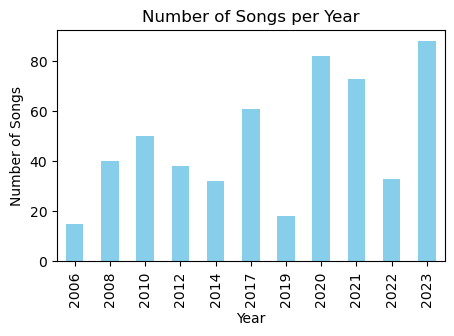

In [8]:
songs_per_year = data.groupby('year')['name'].count()

plt.figure(figsize=(5, 3))
songs_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

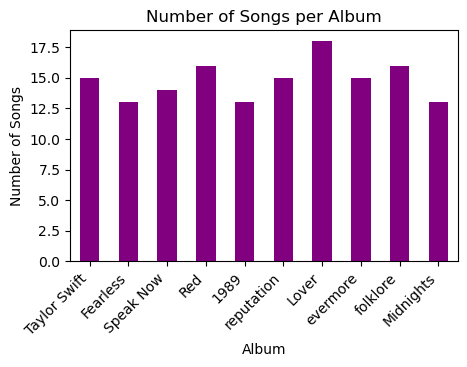

In [9]:
songs_per_album = standard_albums_data.groupby('album')['name'].count()

sorted_albums = standard_albums_data.sort_values('year')['album'].unique()

# Plotting
plt.figure(figsize=(5, 3))
songs_per_album.loc[sorted_albums].plot(kind='bar', color='purple')
plt.title('Number of Songs per Album')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


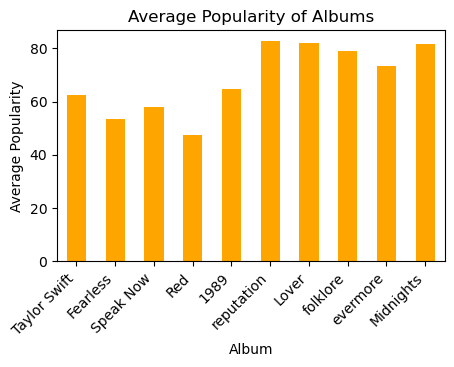

In [11]:
average_popularity_per_album = standard_albums_data.groupby('album')['popularity'].mean()

sorted_albums = standard_albums_data.sort_values(['year', 'popularity'], ascending=[True, False])['album'].unique()

plt.figure(figsize=(5, 3))
average_popularity_per_album.loc[sorted_albums].plot(kind='bar', color='orange')
plt.title('Average Popularity of Albums')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


Let's utilize some of the linear and logistic methods we've learned in class to try to make predictions about songs and albums based on their Spotify metrics.

In [47]:
standard_albums_data.head()
X = standard_albums_data[['album', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']]
y = standard_albums_data['popularity']

X = pd.get_dummies(X, columns=['album'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
names, mses, rmses, r2s = [], [], [], []

def show_metrics(y_test, y_pred, model_type):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    result = f'''
    {model_type} MSE  : {mse}
    {model_type} RMSE : {rmse} 
    {model_type} R^2  : {r2}
    '''
    
    names.append(model_type)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)
    
    print(result)

Let's try to predict song popularity using linear regression.

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

show_metrics(y_test, lr_pred, "Linear Regression")


    Linear Regression MSE  : 58.10695992797153
    Linear Regression RMSE : 7.6227921346427605 
    Linear Regression R^2  : 0.7397729745866206
    


In [49]:
rfr = RandomForestRegressor(random_state=40)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

show_metrics(y_test, rfr_pred, "Random Forest Regressor")


    Random Forest Regressor MSE  : 110.34071333333337
    Random Forest Regressor RMSE : 10.50431879434994 
    Random Forest Regressor R^2  : 0.5058485997492086
    


The above results were not great. This is likely due to .....
IS THERE ANY WAY TO ITERATE? OR IS IT NOT WORTH IT?

Next, let's try using logistic regression for a classification task. Here, we want to see if we can fit songs to albums based on their Spotify metrics.

In [ ]:
X = standard_albums_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = standard_albums_data['album']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=13)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


This is clearly not a very good model! Songs can have similar metrics across albums. Additionally, given that an album typically has less than 20 songs, there is limited training data and it is hard for the model to pick up on nuances.

When it comes to music, it may be better to look for patterns based on lyrics, since that's where the true essence of a song lies. If we can uncover patterns in the lyrics, perhaps we can classify Swift's songs more accurately by album and even emotion.

In [53]:
import os
from pathlib import Path
import re

# album_data = pd.read_csv('/all_song_data/Albums.csv')

albums = []
songs = []
lyrics = []

standard_albums = ['TaylorSwift', 'Fearless_TaylorsVersion_', 'SpeakNow', 'Red_TaylorsVersion_', '1989', 'Reputation', 'Lover', 'Folklore', 'Evermore', 'Midnights_TheTillDawnEdition_']

for dirname, _, filenames in os.walk('all_song_data/Albums'):
    album_name = os.path.split(dirname)[-1]
    if album_name in standard_albums:
        for filename in filenames:
            albums.append(album_name)
            songs.append(Path(filename).stem)

            with open(os.path.join(dirname, filename), 'r', encoding='utf-8') as f:
                raw_lyrics = f.read()

            # Clean up the lyrics by replacing non-standard characters
            raw_lyrics = raw_lyrics.encode('ascii', 'replace').decode().replace('?', ' ')
            raw_lyrics = raw_lyrics.replace('\n', ' ')
            raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)
            
            # Remove any words between brackets (Chorus, etc.)
            pattern = re.compile(r'\[.*?\]')
            # Use sub() method to replace matched patterns with an empty string
            raw_lyrics = re.sub(pattern, '', raw_lyrics)
        
            # Remove lyrics header
            raw_lyrics = re.sub('.*Lyrics', '', raw_lyrics)

            # Remove end characters (number + 'Embed' or number + 'KEmbed')
            raw_lyrics = re.sub('[0-9]+KEmbed', '', raw_lyrics)
            raw_lyrics = re.sub('[0-9]+Embed', '', raw_lyrics)

            lyrics.append(raw_lyrics)

preprocessed_df = pd.DataFrame({'Album': albums, 'Song': songs, 'Lyrics': lyrics})
preprocessed_df.dropna()
preprocessed_df.head()

,Album,Song,Lyrics
0,Fearless_TaylorsVersion_,TheWayILovedYou_TaylorsVersion_,He is sensible and so incredible And all my s...
1,Fearless_TaylorsVersion_,Fifteen_TaylorsVersion_,You take a deep breath and you walk through t...
2,Fearless_TaylorsVersion_,DontYou_TaylorsVersion__FromtheVault_,"Hey, I knew I'd run into you somewhere It's b..."
3,Fearless_TaylorsVersion_,TheOtherSideoftheDoor_TaylorsVersion_,In the heat of the fight I walked away Ignori...
4,Fearless_TaylorsVersion_,JumpThenFall_TaylorsVersion_,I like the way you sound in the mornin' We're...


A common practice in NLP when doing sentiment analysis is creating word clouds to get a sense of the overall trends in a dataset and to make sure data is being represented the way we'd like.

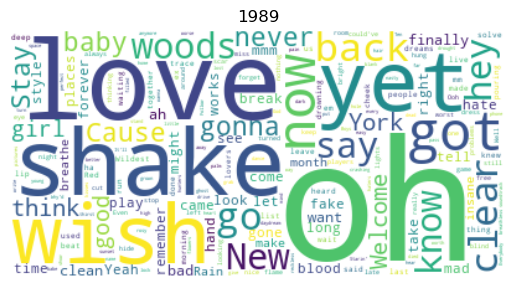

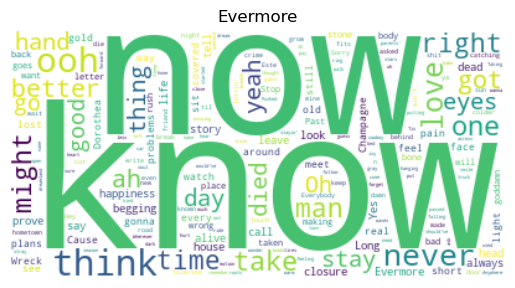

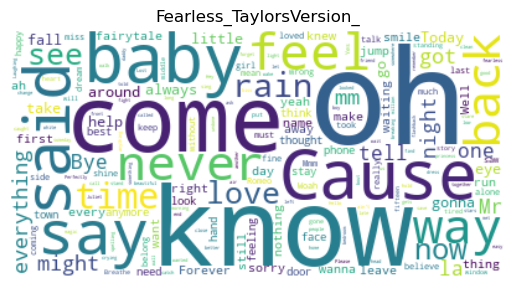

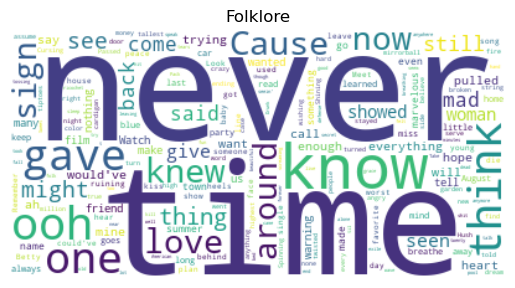

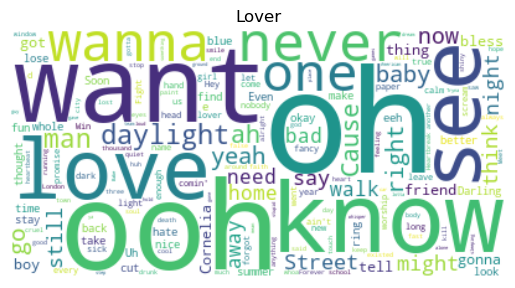

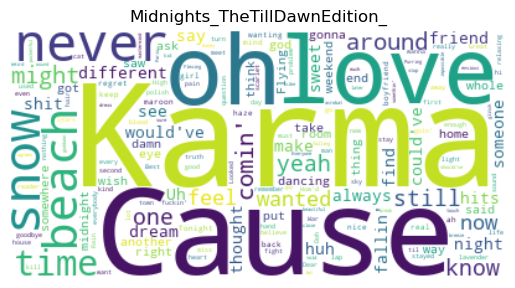

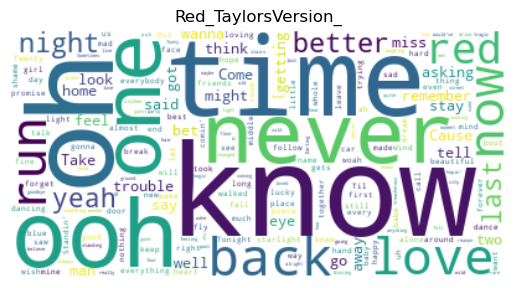

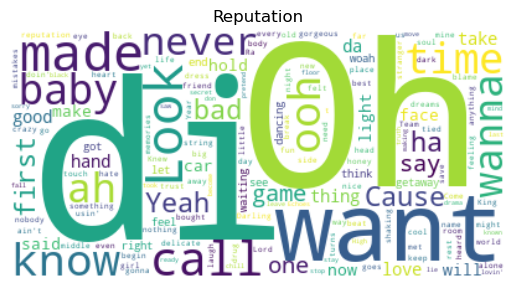

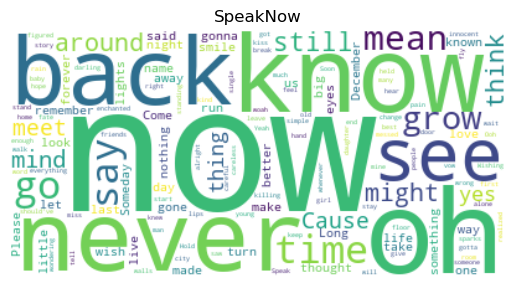

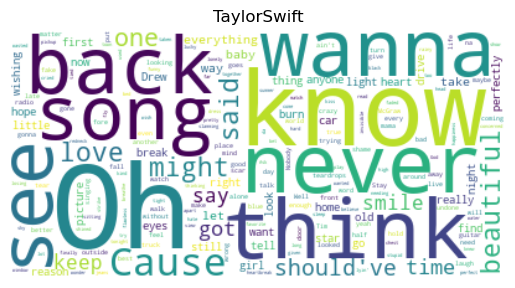

In [54]:
# Create word cloud and plot visualization for each album
from wordcloud import WordCloud
import matplotlib.pyplot as plt

album_group = preprocessed_df.groupby('Album')

for name, group in album_group:
    wordcloud = WordCloud(collocations = False, 
                          background_color = 'white').generate(' '.join(group['Lyrics']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(name)
    plt.axis("off")
    plt.show()

These word clouds give us a sense of common words used throughout albums. They also highlight some words we might not want to include in our NLP techniques - these include words with minimal emotional value like "oh" and "ooh."

Now, we will perform sentiment analysis using NLTK and Textblob. We'll compare the results in a nicely formatted table to keep track of differences.

In [55]:
# Sentiment analysis by album
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from termcolor import colored

# Display results in an easy-to-interpret table. Positive = green, negative = red
from prettytable import PrettyTable
nltk.download('vader_lexicon')

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Song Title", "NLTK", "TextBlob"]

# Function for sentiment analysis using NLTK's VADER sentiment analysis tool
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function for sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)

    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
# function to get the appropriate color for the given sentiment
def get_color(sentiment):
    if sentiment == 'Positive':
        return 'green'
    else:
        return 'red'

for name, group in album_group:
    
    songs = group.groupby('Song')
    
    for title, lyrics in songs:
    
        # Sentiment analysis using NLTK
        sentiment_nltk = analyze_sentiment_nltk(' '.join(lyrics['Lyrics']))
        nltk_color = get_color(sentiment_nltk)

        # Sentiment analysis using TextBlob
        sentiment_textblob = analyze_sentiment_textblob(' '.join(lyrics['Lyrics']))
        textblob_color = get_color(sentiment_textblob)

        row = [title, colored(sentiment_nltk, nltk_color), colored(sentiment_textblob, textblob_color)]
        table.add_row(row)
        
print(table)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dessydusichka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


+-----------------------------------------------------------+----------+----------+
|                         Song Title                        |   NLTK   | TextBlob |
+-----------------------------------------------------------+----------+----------+
|                       1989_Booklet_                       | Positive | Positive |
|                    AllYouHadtoDoWasStay                   | Positive | Positive |
|                          BadBlood                         | Negative | Negative |
|                         BlankSpace                        | Negative | Negative |
|                           Clean                           | Positive | Positive |
|                      HowYouGetTheGirl                     | Negative | Negative |
|                        IKnowPlaces                        | Negative | Negative |
|                       IWishYouWould                       | Negative | Positive |
|                       OutOfTheWoods                       | Positive | Pos

TODO: need to figure out how to handle the bottom section. I think we should find a different repo that implements context analysis and/or negation handling and try to get different results.

https://github.com/UtkarshRedd/Negation_handlingThe above results are okay, but not great. The basic idea behind sentiment analysis is that each word is analyze out of context (so for example, if the word 'important' is seen in Would've, Could've, Should've, it will be classified as positive even though in context the lyric is negative (But, Lord, you made me feel important/And then you tried to erase us)).

So, to fix this issue and get a more accurate sentiment analysis, we need to analyze words in context!

I will be using the code in this repo: https://github.com/UtkarshRedd/Negation_handling to do so.

In [56]:
# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Song Title", "NLTK", "TextBlob", "NLTK Negation"]

def negation_handler(sentence):	
    temp = int(0)
    for i in range(len(sentence)):
        if sentence[i-1] in ['not',"n't"]:
            antonyms = []
            for syn in wordnet.synsets(sentence[i]):
                syns = wordnet.synsets(sentence[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(sentence[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                        temp = 1 - word1.wup_similarity(word2)
                    if temp>max_dissimilarity:
                        max_dissimilarity = temp
                        antonym_max = ant
                        sentence[i] = antonym_max
                        sentence[i-1] = ''
#     while '' in sentence:
#         sentence.remove('')
    return sentence


# Function for sentiment analysis using NLTK's VADER sentiment analysis tool
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
# function to get the appropriate color for the given sentiment
def get_color(sentiment):
    if sentiment == 'Positive':
        return 'green'
    else:
        return 'red'

for name, group in album_group:
    songs = group.groupby('Song')
    
    for title, lyrics in songs:
    
        # Sentiment analysis using NLTK
        sentiment_nltk = analyze_sentiment_nltk(' '.join(lyrics['Lyrics']))
        nltk_color = get_color(sentiment_nltk)

        # Sentiment analysis using TextBlob
        sentiment_textblob = analyze_sentiment_textblob(' '.join(lyrics['Lyrics']))
        textblob_color = get_color(sentiment_textblob)

        # Sentiment analysis using NLTK with negation handling
        lyrics = negation_handler(' '.join(lyrics['Lyrics']))
        sentiment_nltk_negation = analyze_sentiment_nltk(lyrics)
        nltk_negation_color = get_color(sentiment_nltk_negation)
        
        row = [title, colored(sentiment_nltk, nltk_color), colored(sentiment_textblob, textblob_color), colored(sentiment_nltk_negation, nltk_negation_color)]
        table.add_row(row)
        
print(table)

+-----------------------------------------------------------+----------+----------+---------------+
|                         Song Title                        |   NLTK   | TextBlob | NLTK Negation |
+-----------------------------------------------------------+----------+----------+---------------+
|                       1989_Booklet_                       | Positive | Positive |    Positive   |
|                    AllYouHadtoDoWasStay                   | Positive | Positive |    Positive   |
|                          BadBlood                         | Negative | Negative |    Negative   |
|                         BlankSpace                        | Negative | Negative |    Negative   |
|                           Clean                           | Positive | Positive |    Positive   |
|                      HowYouGetTheGirl                     | Negative | Negative |    Negative   |
|                        IKnowPlaces                        | Negative | Negative |    Negative   |


Now, I think I want to plot danceability, acousticness, etc. for specific songs in each album, to get a better visualization of song metrics and how they correspond to sentiment. I think linking variables like danceability and valence to NLTK sentiment analysis to get a more nuanced analysis of each song might be beneficial in the future, so this will be my first step.

In [ ]:
#List for tomorrow because I am very tired. I found a bunch of cool resources I want to implement for more complex analysis!

#TODO - plot topic-based modeling - I think this combined with sentiment analysis + spotify metric analysis could be interesting.
#TODO - find correlations between data in spotify dataset and ktlk analysis



In [ ]:
# Step 1: Plot average danceability, acousticness, etc. across albums
data_per_album = data.groupby('album')

columns = data.columns[7:-2]

for c in columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'average {c} across albums')
    plt.ylabel('average value')  
    
    data_per_album = data.groupby('album')[c].mean()
    
    data_per_album.plot(kind='bar', color='skyblue')
    
    plt.show()


Ok, so a lot of albums are duplicated (deluxe version, etc). In order to prevent this sort of repetition, I'm going to filter out the duplicates and live versions of songs by taking the Taylor's Version of each album, and taking the version with the most songs (most deluxe tracks). If there is not a Taylor's Version of an album, I will just take the longest version of that album. For now I'm just hardcoding it.

In [ ]:
def filter_duplicate_albums():

    data = pd.read_csv('taylor_swift_spotify.csv')
    data.head()

    # Data cleaning
    data["release_date"] = pd.to_datetime(data["release_date"])
    data["year"] = data["release_date"].dt.year
    
    standard_albums = ['Taylor Swift', "Fearless (Taylor's Version)", "Speak Now (Taylor's Version)", "Red (Taylor's Version)", "1989 (Taylor's Version) [Deluxe]", 'reputation', 'Lover', "folklore (deluxe version)", "evermore (deluxe version)", "Midnights (The Til Dawn Edition)"]
    
    standard_albums_data = data.loc[data['album'].isin(standard_albums)]
    
    return standard_albums_data

filtered_data = filter_duplicate_albums()

columns = filtered_data.columns[7:-2]

for c in columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Average {c} Across Albums')
    plt.ylabel('Average Value')  
    
    data_per_album = filtered_data.groupby('album')[c].mean()
    
    data_per_album.plot(kind='bar', color='skyblue')
    
    plt.show()

Much better! It's a lot easier to see patterns across albums now - for example, reputation has high speechiness compared to other albums because it has some rap in it.

Now that that's done, I want to analyze the songs from a different angle, using word embeddings. I'm starting off with the information I found in this article: https://towardsdatascience.com/lyric-based-song-recommendation-with-doc2vec-embeddings-and-spotifys-api-5a61c39f1ce2.

At the end, he says this: "On the other hand, lyric-based song embeddings could be just one small piece of a larger recommendation engine. The current application only uses the lyrics when searching for similar songs, but better recommendations would surely be achieved when taking into account the way a song sounds in addition to what it says." 

I think that's something we can try to do!

In [61]:
from pathlib import Path
import re
import os
import pandas as pd

albums = []
songs = []
lyrics = []

standard_albums = ['TaylorSwift', 'Fearless_TaylorsVersion_', 'SpeakNow', 'Red_TaylorsVersion_', '1989', 'Reputation', 'Lover', 'Folklore', 'Evermore', 'Midnights_TheTillDawnEdition_']

for dirname, _, filenames in os.walk('all_song_data/Albums'):
    album_name = os.path.split(dirname)[-1]
    if album_name in standard_albums:
        for filename in filenames:
            albums.append(album_name)
            songs.append(Path(filename).stem)

            with open(os.path.join(dirname, filename), 'r', encoding='utf-8') as f:
                raw_lyrics = f.read()
                
                # Clean up the lyrics by replacing non-standard characters
                raw_lyrics = raw_lyrics.encode('ascii', 'replace').decode().replace('?', ' ')
                raw_lyrics = raw_lyrics.replace('\n', ' ')
                raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)

                # Remove any words between brackets (Chorus, etc.)
                pattern = re.compile(r'\[.*?\]')
                # Use sub() method to replace matched patterns with an empty string
                raw_lyrics = re.sub(pattern, '', raw_lyrics)

                # Remove lyrics header
                raw_lyrics = re.sub('.*Lyrics', '', raw_lyrics)

                # Remove end characters (number + 'Embed' or number + 'KEmbed')
                raw_lyrics = re.sub('[0-9]+KEmbed', '', raw_lyrics)
                raw_lyrics = re.sub('[0-9]+Embed', '', raw_lyrics)
                
                lyrics.append(raw_lyrics)

df = pd.DataFrame({'Album': albums, 'Song': songs, 'Lyrics': lyrics})

print(df.head())

<>:25: DeprecationWarning: invalid escape sequence \s
<>:25: DeprecationWarning: invalid escape sequence \s
/var/folders/0v/3bb9_6nj4ds4lr5h0g4pq1wc0000gn/T/ipykernel_30958/2818669901.py:25: DeprecationWarning: invalid escape sequence \s
  raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)


                      Album                                   Song  \
0  Fearless_TaylorsVersion_        TheWayILovedYou_TaylorsVersion_   
1  Fearless_TaylorsVersion_                Fifteen_TaylorsVersion_   
2  Fearless_TaylorsVersion_  DontYou_TaylorsVersion__FromtheVault_   
3  Fearless_TaylorsVersion_  TheOtherSideoftheDoor_TaylorsVersion_   
4  Fearless_TaylorsVersion_           JumpThenFall_TaylorsVersion_   

                                              Lyrics  
0   He is sensible and so incredible And all my s...  
1   You take a deep breath and you walk through t...  
2   Hey, I knew I'd run into you somewhere It's b...  
3   In the heat of the fight I walked away Ignori...  
4   I like the way you sound in the mornin' We're...  


In [70]:
#Import the libraries for preprocessing, stemming, lemmatization, removing english stopwords & punctuations
import os
from pathlib import Path
import re
import string
import nltk
import zipfile
import os

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# # Specify the path to the WordNet zip file
# wordnet_zip_path = "/usr/share/nltk_data/corpora/wordnet.zip"

# # Specify the directory where you want to extract WordNet
# extracted_dir = "/usr/share/nltk_data/corpora"

# # Check if the zip file exists
# if os.path.exists(wordnet_zip_path):
#     # Create the directory if it doesn't exist
#     os.makedirs(extracted_dir, exist_ok=True)

#     # Unzip the WordNet package
#     with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extracted_dir)

#     print(f"WordNet has been successfully extracted to {extracted_dir}")
# else:
#     print(f"Error: WordNet zip file not found at {wordnet_zip_path}")
    
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()


stop_words = stopwords.words('english')
stop_words.extend(['oh', 'ooh', 'ah'])

import string
exclude = set(string.punctuation)

#Create a single function to preprocess
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(wordnet_lemmatizer.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(line).split() for line in df['Lyrics']] 
print('clean', doc_clean[0:5])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dessydusichka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dessydusichka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dessydusichka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


179
182
clean [['sensible', 'incredible', 'single', 'friend', 'jealous', 'say', 'everything', 'need', 'hear', 'like', 'ask', 'anything', 'better', 'open', 'door', 'get', 'car', 'say', 'you', 'look', 'beautiful', 'tonight', 'feel', 'perfectly', 'fine', 'miss', 'screaming', 'fighting', 'kissing', 'rain', '2am', 'im', 'cursing', 'name', 'love', 'act', 'insane', 'thats', 'way', 'loved', 'breaking', 'coming', 'undone', 'rollercoaster', 'kind', 'rush', 'never', 'knew', 'could', 'feel', 'much', 'thats', 'way', 'loved', 'respect', 'space', 'never', 'make', 'wait', 'call', 'exactly', 'say', 'he', 'close', 'mother', 'talk', 'business', 'father', 'he', 'charming', 'endearing', 'im', 'comfortable', 'miss', 'screaming', 'fighting', 'kissing', 'rain', '2am', 'im', 'cursing', 'name', 'love', 'act', 'insane', 'thats', 'way', 'loved', 'breaking', 'coming', 'undone', 'rollercoaster', 'kind', 'rush', 'never', 'knew', 'could', 'feel', 'much', 'thats', 'way', 'loved', 'cant', 'see', 'smile', 'im', 'faking'

In [71]:
#Import the Gensim libraries
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)


#Create the corpora matrix
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]
#Initiate the model
Lda = gensim.models.ldamodel.LdaModel

num_topics = 20

#Fit the model with corpora matrix with dictionary for 20 topics
ldamodel = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)

#Check the results for 20 topics
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))
    
#Check the score for a random sentence (100th) in the book
example = doc_clean[100]
# print(example,'\n')
example_lda = dictionary.doc2bow(example)

for index, score in sorted(ldamodel[example_lda], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}\n".format(score, ldamodel.print_topic(index, 5)))

Topic: 0 Word: 0.055*"shake" + 0.022*"want" + 0.022*"i" + 0.021*"gonna" + 0.019*"think" + 0.019*"know" + 0.017*"you" + 0.016*"off" + 0.016*"im" + 0.014*"like"

Topic: 1 Word: 0.036*"love" + 0.035*"like" + 0.023*"im" + 0.022*"karma" + 0.017*"cause" + 0.016*"time" + 0.012*"know" + 0.010*"last" + 0.008*"you" + 0.008*"could"

Topic: 2 Word: 0.030*"never" + 0.018*"wish" + 0.015*"run" + 0.014*"know" + 0.014*"like" + 0.012*"i" + 0.012*"im" + 0.010*"car" + 0.010*"he" + 0.009*"id"

Topic: 3 Word: 0.047*"call" + 0.041*"i" + 0.029*"want" + 0.023*"know" + 0.019*"time" + 0.018*"im" + 0.017*"like" + 0.016*"one" + 0.016*"babe" + 0.014*"baby"

Topic: 4 Word: 0.020*"baby" + 0.015*"back" + 0.015*"like" + 0.013*"know" + 0.012*"love" + 0.012*"said" + 0.011*"time" + 0.011*"got" + 0.011*"forever" + 0.010*"rain"

Topic: 5 Word: 0.103*"stay" + 0.026*"time" + 0.021*"mad" + 0.020*"oh" + 0.017*"im" + 0.016*"ive" + 0.014*"think" + 0.011*"best" + 0.010*"palm" + 0.010*"covered"

Topic: 6 Word: 0.025*"like" + 0.016*

In [73]:
# can't get the following viz to work:

import pyLDAvis 
import pyLDAvis.gensim

# Get necessary data for pyLDAvis
topic_term_dists = ldamodel.get_topics()
doc_topic_dists = [ldamodel.get_document_topics(doc) for doc in corpus]
doc_lengths = [len(doc) for doc in doc_clean]
vocab = list(dictionary.token2id.keys())
term_frequency = [dictionary.dfs[word_id] for word_id in dictionary.dfs]


vis = pyLDAvis.gensim.prepare(topic_model = ldamodel, corpus=corpus, dictionary=dictionary)
#                               , topic_term_dists=topic_term_dists, 
#                               doc_topic_dists=doc_topic_dists, 
#                               doc_lengths=doc_lengths,
#                              vocab=vocab,
#                              term_frequency=term_frequency)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis)

ImportError: cannot import name 'get_ipython_dir' from 'IPython.utils.path' (/Users/dessydusichka/opt/anaconda3/lib/python3.9/site-packages/IPython/utils/path.py)

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0 good resource for qualitative testing of out-of-the-box NLP models

In [12]:
#Import the Gensim libraries
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import numpy as np
import tqdm

# create dictionary
dictionary = corpora.Dictionary(doc_clean)
# create corpus
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

# # create LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=dictionary,
#                                        num_topics=10, 
#                                        random_state=100,
#                                        chunksize=100,
#                                        passes=10,
#                                        per_word_topics=True)

# # calculate coherence score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('Coherence Score: ', coherence_lda)

def calculate_coherence(corpus, original_text, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=original_text, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

tuned_grid = {}
tuned_grid['Validation_Set'] = {}

# Topics range
min_topics = 10
max_topics = 25
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    print(a, k, b)
                    # get the coherence score for the given parameters
                    cv = calculate_coherence(corpus=corpus_sets[i], original_text=doc_clean, dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    print('coherence: ', cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  0%|          | 4/900 [01:16<4:44:22, 19.04s/it]

0.01 10 0.01



  0%|          | 1/900 [00:06<1:43:29,  6.91s/it]

coherence:  0.27039054752635455
0.01 10 0.31


  0%|          | 2/900 [00:13<1:43:01,  6.88s/it]

coherence:  0.2686469611187773
0.01 10 0.61


  0%|          | 3/900 [00:21<1:49:08,  7.30s/it]

coherence:  0.32099855788204246
0.01 10 0.9099999999999999


  0%|          | 4/900 [00:29<1:54:45,  7.69s/it]

coherence:  0.34223485115518637
0.01 10 symmetric


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
_pickle.UnpicklingError: pickle data was truncated
  1%|          | 5/900 [00:38<2:00:59,  8.11s/it]

coherence:  0.27248673858432876
0.31 10 0.01


  1%|          | 6/900 [00:47<2:02:23,  8.21s/it]

coherence:  0.2680151699585597
0.31 10 0.31


  1%|          | 7/900 [00:55<2:02:30,  8.23s/it]

coherence:  0.26806115644230266
0.31 10 0.61


  1%|          | 8/900 [01:03<2:01:53,  8.20s/it]

coherence:  0.3182749004012343
0.31 10 0.9099999999999999


  1%|          | 9/900 [01:11<2:00:44,  8.13s/it]

coherence:  0.34600194071914175
0.31 10 symmetric


  1%|          | 10/900 [01:19<2:01:13,  8.17s/it]

coherence:  0.26987788447721817
0.61 10 0.01


  1%|          | 11/900 [01:27<2:00:13,  8.11s/it]

coherence:  0.26206179966405574
0.61 10 0.31


  1%|▏         | 12/900 [01:35<1:58:18,  7.99s/it]

coherence:  0.27465347203260704
0.61 10 0.61


  1%|▏         | 13/900 [01:43<1:57:36,  7.96s/it]

coherence:  0.3134643049082372
0.61 10 0.9099999999999999


  2%|▏         | 14/900 [01:51<2:00:27,  8.16s/it]

coherence:  0.3460697030191912
0.61 10 symmetric


  2%|▏         | 15/900 [01:59<1:59:14,  8.08s/it]

coherence:  0.26848750944547334
0.9099999999999999 10 0.01


  2%|▏         | 16/900 [02:07<1:57:30,  7.98s/it]

coherence:  0.26117264991896727
0.9099999999999999 10 0.31


  2%|▏         | 17/900 [02:15<1:56:04,  7.89s/it]

coherence:  0.25376719723254537
0.9099999999999999 10 0.61


  2%|▏         | 18/900 [02:23<1:55:42,  7.87s/it]

coherence:  0.3248478666380563
0.9099999999999999 10 0.9099999999999999


  2%|▏         | 19/900 [02:30<1:55:22,  7.86s/it]

coherence:  0.33522871548620575
0.9099999999999999 10 symmetric


  2%|▏         | 20/900 [02:38<1:54:29,  7.81s/it]

coherence:  0.2668919637304216
symmetric 10 0.01


  2%|▏         | 21/900 [02:46<1:53:48,  7.77s/it]

coherence:  0.27185174323940153
symmetric 10 0.31


  2%|▏         | 22/900 [02:54<1:53:57,  7.79s/it]

coherence:  0.27244924740646903
symmetric 10 0.61


  3%|▎         | 23/900 [03:01<1:53:14,  7.75s/it]

coherence:  0.32287428141349883
symmetric 10 0.9099999999999999


  3%|▎         | 24/900 [03:09<1:53:10,  7.75s/it]

coherence:  0.3374513014853172
symmetric 10 symmetric


  3%|▎         | 25/900 [03:17<1:52:47,  7.73s/it]

coherence:  0.27711308292925096
asymmetric 10 0.01


  3%|▎         | 26/900 [03:24<1:52:20,  7.71s/it]

coherence:  0.28117243601782294
asymmetric 10 0.31


  3%|▎         | 27/900 [03:32<1:52:16,  7.72s/it]

coherence:  0.2754277972388766
asymmetric 10 0.61


  3%|▎         | 28/900 [03:40<1:52:14,  7.72s/it]

coherence:  0.32865922948322596
asymmetric 10 0.9099999999999999


  3%|▎         | 29/900 [03:48<1:52:05,  7.72s/it]

coherence:  0.35837269507231867
asymmetric 10 symmetric


  3%|▎         | 30/900 [03:55<1:52:41,  7.77s/it]

coherence:  0.26281915326646876
0.01 11 0.01


  3%|▎         | 31/900 [04:03<1:52:42,  7.78s/it]

coherence:  0.27148246183223135
0.01 11 0.31


  4%|▎         | 32/900 [04:11<1:51:40,  7.72s/it]

coherence:  0.29102811277246565
0.01 11 0.61


  4%|▎         | 33/900 [04:19<1:51:55,  7.75s/it]

coherence:  0.33297778498372677
0.01 11 0.9099999999999999


  4%|▍         | 34/900 [04:27<1:52:52,  7.82s/it]

coherence:  0.35988751936459445
0.01 11 symmetric


  4%|▍         | 35/900 [04:34<1:51:59,  7.77s/it]

coherence:  0.26878517267239327
0.31 11 0.01


  4%|▍         | 36/900 [04:42<1:51:52,  7.77s/it]

coherence:  0.2730928443367157
0.31 11 0.31


  4%|▍         | 37/900 [04:50<1:52:11,  7.80s/it]

coherence:  0.27919172581606033
0.31 11 0.61


  4%|▍         | 38/900 [04:58<1:52:02,  7.80s/it]

coherence:  0.3467842071413382
0.31 11 0.9099999999999999


  4%|▍         | 39/900 [05:06<1:51:47,  7.79s/it]

coherence:  0.38259963721060186
0.31 11 symmetric


  4%|▍         | 40/900 [05:13<1:51:43,  7.80s/it]

coherence:  0.2748601177367606
0.61 11 0.01


  5%|▍         | 41/900 [05:21<1:52:18,  7.84s/it]

coherence:  0.2786276778584468
0.61 11 0.31


  5%|▍         | 42/900 [05:30<1:54:24,  8.00s/it]

coherence:  0.29458195543716886
0.61 11 0.61


  5%|▍         | 43/900 [05:38<1:56:33,  8.16s/it]

coherence:  0.33995579861292274
0.61 11 0.9099999999999999


  5%|▍         | 44/900 [05:46<1:56:03,  8.14s/it]

coherence:  0.3065867663086957
0.61 11 symmetric


  5%|▌         | 45/900 [05:54<1:55:02,  8.07s/it]

coherence:  0.28097665789193776
0.9099999999999999 11 0.01


  5%|▌         | 46/900 [06:02<1:53:16,  7.96s/it]

coherence:  0.27689968482165733
0.9099999999999999 11 0.31


  5%|▌         | 47/900 [06:10<1:52:59,  7.95s/it]

coherence:  0.2794506306008227
0.9099999999999999 11 0.61


  5%|▌         | 48/900 [06:18<1:52:12,  7.90s/it]

coherence:  0.302796530095088
0.9099999999999999 11 0.9099999999999999


  5%|▌         | 49/900 [06:25<1:51:48,  7.88s/it]

coherence:  0.3422646160930298
0.9099999999999999 11 symmetric


  6%|▌         | 50/900 [06:33<1:51:20,  7.86s/it]

coherence:  0.28664706107032134
symmetric 11 0.01


  6%|▌         | 51/900 [06:41<1:50:46,  7.83s/it]

coherence:  0.26844184241099917
symmetric 11 0.31


  6%|▌         | 52/900 [06:49<1:50:17,  7.80s/it]

coherence:  0.2777324076683254
symmetric 11 0.61


  6%|▌         | 53/900 [06:56<1:49:47,  7.78s/it]

coherence:  0.34138424406897017
symmetric 11 0.9099999999999999


  6%|▌         | 54/900 [07:04<1:49:38,  7.78s/it]

coherence:  0.3647717676045177
symmetric 11 symmetric


  6%|▌         | 55/900 [07:12<1:49:13,  7.76s/it]

coherence:  0.27131923829874505
asymmetric 11 0.01


  6%|▌         | 56/900 [07:20<1:49:12,  7.76s/it]

coherence:  0.2709186537557259
asymmetric 11 0.31


  6%|▋         | 57/900 [07:27<1:48:51,  7.75s/it]

coherence:  0.29788681801837097
asymmetric 11 0.61


  6%|▋         | 58/900 [07:35<1:49:52,  7.83s/it]

coherence:  0.3700986840541336
asymmetric 11 0.9099999999999999


  7%|▋         | 59/900 [07:43<1:49:20,  7.80s/it]

coherence:  0.33056747848913615
asymmetric 11 symmetric


  7%|▋         | 60/900 [07:51<1:49:10,  7.80s/it]

coherence:  0.2812553227401694
0.01 12 0.01


  7%|▋         | 61/900 [07:59<1:49:14,  7.81s/it]

coherence:  0.2884413867754989
0.01 12 0.31


  7%|▋         | 62/900 [08:07<1:48:38,  7.78s/it]

coherence:  0.29369749781430005
0.01 12 0.61


  7%|▋         | 63/900 [08:14<1:48:33,  7.78s/it]

coherence:  0.33318806984789057
0.01 12 0.9099999999999999


  7%|▋         | 64/900 [08:22<1:48:12,  7.77s/it]

coherence:  0.340102211497733
0.01 12 symmetric


  7%|▋         | 65/900 [08:30<1:48:11,  7.77s/it]

coherence:  0.2785673155523786
0.31 12 0.01


  7%|▋         | 66/900 [08:38<1:47:58,  7.77s/it]

coherence:  0.28649289233916314
0.31 12 0.31


  7%|▋         | 67/900 [08:45<1:47:36,  7.75s/it]

coherence:  0.28022306246702816
0.31 12 0.61


  8%|▊         | 68/900 [08:53<1:48:30,  7.83s/it]

coherence:  0.30332444883728926
0.31 12 0.9099999999999999


  8%|▊         | 69/900 [09:01<1:49:04,  7.88s/it]

coherence:  0.38781794301202455
0.31 12 symmetric


  8%|▊         | 70/900 [09:09<1:48:27,  7.84s/it]

coherence:  0.28955215466109735
0.61 12 0.01


  8%|▊         | 71/900 [09:17<1:47:42,  7.80s/it]

coherence:  0.27709171931892973
0.61 12 0.31


  8%|▊         | 72/900 [09:25<1:48:15,  7.84s/it]

coherence:  0.2812494192690507
0.61 12 0.61


  8%|▊         | 73/900 [09:33<1:48:13,  7.85s/it]

coherence:  0.3058263464323914
0.61 12 0.9099999999999999


  8%|▊         | 74/900 [09:41<1:48:31,  7.88s/it]

coherence:  0.39993227815954385
0.61 12 symmetric


  8%|▊         | 75/900 [09:48<1:47:41,  7.83s/it]

coherence:  0.28940246361992816
0.9099999999999999 12 0.01


  8%|▊         | 76/900 [09:56<1:47:56,  7.86s/it]

coherence:  0.26619261086630047
0.9099999999999999 12 0.31


  9%|▊         | 77/900 [10:04<1:49:46,  8.00s/it]

coherence:  0.2874247399998007
0.9099999999999999 12 0.61


  9%|▊         | 78/900 [10:13<1:52:02,  8.18s/it]

coherence:  0.2981823181457684
0.9099999999999999 12 0.9099999999999999


  9%|▉         | 79/900 [10:21<1:52:44,  8.24s/it]

coherence:  0.39182090245399426
0.9099999999999999 12 symmetric


  9%|▉         | 80/900 [10:29<1:51:11,  8.14s/it]

coherence:  0.2764773833745921
symmetric 12 0.01


  9%|▉         | 81/900 [10:37<1:49:32,  8.02s/it]

coherence:  0.2927365135937361
symmetric 12 0.31


  9%|▉         | 82/900 [10:45<1:48:37,  7.97s/it]

coherence:  0.2896484188205271
symmetric 12 0.61


  9%|▉         | 83/900 [10:53<1:48:55,  8.00s/it]

coherence:  0.30096905140718117
symmetric 12 0.9099999999999999


  9%|▉         | 84/900 [11:01<1:48:42,  7.99s/it]

coherence:  0.3551399232192371
symmetric 12 symmetric


  9%|▉         | 85/900 [11:09<1:47:17,  7.90s/it]

coherence:  0.2774464253108492
asymmetric 12 0.01


 10%|▉         | 86/900 [11:16<1:46:20,  7.84s/it]

coherence:  0.29655551489960746
asymmetric 12 0.31


 10%|▉         | 87/900 [11:24<1:45:58,  7.82s/it]

coherence:  0.2965137449241793
asymmetric 12 0.61


 10%|▉         | 88/900 [11:32<1:45:57,  7.83s/it]

coherence:  0.3383763291187181
asymmetric 12 0.9099999999999999


 10%|▉         | 89/900 [11:40<1:45:38,  7.82s/it]

coherence:  0.3851005906181049
asymmetric 12 symmetric


 10%|█         | 90/900 [11:47<1:44:56,  7.77s/it]

coherence:  0.2824348194962778
0.01 13 0.01


 10%|█         | 91/900 [11:55<1:45:20,  7.81s/it]

coherence:  0.2674724198608676
0.01 13 0.31


 10%|█         | 92/900 [12:03<1:44:57,  7.79s/it]

coherence:  0.2583347893782029
0.01 13 0.61


 10%|█         | 93/900 [12:11<1:44:53,  7.80s/it]

coherence:  0.2515774178461908
0.01 13 0.9099999999999999


 10%|█         | 94/900 [12:19<1:45:26,  7.85s/it]

coherence:  0.3079994370066633
0.01 13 symmetric


 11%|█         | 95/900 [12:27<1:45:02,  7.83s/it]

coherence:  0.26429937010739607
0.31 13 0.01


 11%|█         | 96/900 [12:35<1:44:51,  7.83s/it]

coherence:  0.2662958127969501
0.31 13 0.31


 11%|█         | 97/900 [12:43<1:45:27,  7.88s/it]

coherence:  0.2690658465110474
0.31 13 0.61


 11%|█         | 98/900 [12:51<1:46:01,  7.93s/it]

coherence:  0.2718505841548889
0.31 13 0.9099999999999999


 11%|█         | 99/900 [12:59<1:46:35,  7.98s/it]

coherence:  0.3673338227543264
0.31 13 symmetric


 11%|█         | 100/900 [13:07<1:45:54,  7.94s/it]

coherence:  0.2731032560650746
0.61 13 0.01


 11%|█         | 101/900 [13:14<1:45:33,  7.93s/it]

coherence:  0.2667236137758672
0.61 13 0.31


 11%|█▏        | 102/900 [13:22<1:45:16,  7.92s/it]

coherence:  0.27539959100402667
0.61 13 0.61


 11%|█▏        | 103/900 [13:30<1:45:31,  7.94s/it]

coherence:  0.2861497273131621
0.61 13 0.9099999999999999


 12%|█▏        | 104/900 [13:39<1:47:34,  8.11s/it]

coherence:  0.3996870900475195
0.61 13 symmetric


 12%|█▏        | 105/900 [13:47<1:48:38,  8.20s/it]

coherence:  0.2743754081182813
0.9099999999999999 13 0.01


 12%|█▏        | 106/900 [13:56<1:49:00,  8.24s/it]

coherence:  0.2748054371479306
0.9099999999999999 13 0.31


 12%|█▏        | 107/900 [14:03<1:47:31,  8.14s/it]

coherence:  0.2689572654278202
0.9099999999999999 13 0.61


 12%|█▏        | 108/900 [14:11<1:46:59,  8.11s/it]

coherence:  0.31324949942837554
0.9099999999999999 13 0.9099999999999999


 12%|█▏        | 109/900 [14:19<1:45:57,  8.04s/it]

coherence:  0.35021926693940986
0.9099999999999999 13 symmetric


 12%|█▏        | 110/900 [14:27<1:46:11,  8.06s/it]

coherence:  0.27350405711198505
symmetric 13 0.01


 12%|█▏        | 111/900 [14:35<1:44:32,  7.95s/it]

coherence:  0.2655408701676817
symmetric 13 0.31


 12%|█▏        | 112/900 [14:43<1:44:28,  7.96s/it]

coherence:  0.25989109042847913
symmetric 13 0.61


 13%|█▎        | 113/900 [14:51<1:45:52,  8.07s/it]

coherence:  0.2568030176651802
symmetric 13 0.9099999999999999


 13%|█▎        | 114/900 [14:59<1:45:32,  8.06s/it]

coherence:  0.331536063784754
symmetric 13 symmetric


 13%|█▎        | 115/900 [15:08<1:48:21,  8.28s/it]

coherence:  0.2654275684672058
asymmetric 13 0.01


 13%|█▎        | 116/900 [15:16<1:46:14,  8.13s/it]

coherence:  0.26322636961097196
asymmetric 13 0.31


 13%|█▎        | 117/900 [15:24<1:45:05,  8.05s/it]

coherence:  0.2564195463863261
asymmetric 13 0.61


 13%|█▎        | 118/900 [15:32<1:44:02,  7.98s/it]

coherence:  0.3038181016076063
asymmetric 13 0.9099999999999999


 13%|█▎        | 119/900 [15:40<1:43:13,  7.93s/it]

coherence:  0.36911152437022055
asymmetric 13 symmetric


 13%|█▎        | 120/900 [15:47<1:42:49,  7.91s/it]

coherence:  0.27116859743416166
0.01 14 0.01


 13%|█▎        | 121/900 [15:55<1:42:52,  7.92s/it]

coherence:  0.2718801895518769
0.01 14 0.31


 14%|█▎        | 122/900 [16:03<1:42:31,  7.91s/it]

coherence:  0.27908489946845316
0.01 14 0.61


 14%|█▎        | 123/900 [16:11<1:42:39,  7.93s/it]

coherence:  0.27746668007276454
0.01 14 0.9099999999999999


 14%|█▍        | 124/900 [16:19<1:42:35,  7.93s/it]

coherence:  0.3197327296895693
0.01 14 symmetric


 14%|█▍        | 125/900 [16:27<1:41:29,  7.86s/it]

coherence:  0.2810282083507304
0.31 14 0.01


 14%|█▍        | 126/900 [16:35<1:41:22,  7.86s/it]

coherence:  0.2753383042360426
0.31 14 0.31


 14%|█▍        | 127/900 [16:43<1:41:18,  7.86s/it]

coherence:  0.27108944505166743
0.31 14 0.61


 14%|█▍        | 128/900 [16:51<1:42:07,  7.94s/it]

coherence:  0.3084774441981314
0.31 14 0.9099999999999999


 14%|█▍        | 129/900 [16:59<1:42:15,  7.96s/it]

coherence:  0.33361318900729625
0.31 14 symmetric


 14%|█▍        | 130/900 [17:07<1:43:42,  8.08s/it]

coherence:  0.27181655894830425
0.61 14 0.01


 15%|█▍        | 131/900 [17:15<1:44:20,  8.14s/it]

coherence:  0.2760443587689635
0.61 14 0.31


 15%|█▍        | 132/900 [17:24<1:44:54,  8.20s/it]

coherence:  0.26649212459074517
0.61 14 0.61


 15%|█▍        | 133/900 [17:32<1:44:13,  8.15s/it]

coherence:  0.3262595503984706
0.61 14 0.9099999999999999


 15%|█▍        | 134/900 [17:40<1:44:25,  8.18s/it]

coherence:  0.2959142009373341
0.61 14 symmetric


 15%|█▌        | 135/900 [17:48<1:43:58,  8.15s/it]

coherence:  0.2728954503161173
0.9099999999999999 14 0.01


 15%|█▌        | 136/900 [17:56<1:43:17,  8.11s/it]

coherence:  0.27415783531219506
0.9099999999999999 14 0.31


 15%|█▌        | 137/900 [18:04<1:42:46,  8.08s/it]

coherence:  0.27197884065199884
0.9099999999999999 14 0.61


 15%|█▌        | 138/900 [18:12<1:41:56,  8.03s/it]

coherence:  0.3253632746304502
0.9099999999999999 14 0.9099999999999999


 15%|█▌        | 139/900 [18:20<1:41:34,  8.01s/it]

coherence:  0.29464870585014985
0.9099999999999999 14 symmetric


 16%|█▌        | 140/900 [18:28<1:41:12,  7.99s/it]

coherence:  0.27759227912018675
symmetric 14 0.01


 16%|█▌        | 141/900 [18:36<1:40:28,  7.94s/it]

coherence:  0.2718801895518769
symmetric 14 0.31


 16%|█▌        | 142/900 [18:44<1:40:18,  7.94s/it]

coherence:  0.2738324465130186
symmetric 14 0.61


 16%|█▌        | 143/900 [18:52<1:40:31,  7.97s/it]

coherence:  0.2807332445074994
symmetric 14 0.9099999999999999


 16%|█▌        | 144/900 [19:00<1:40:54,  8.01s/it]

coherence:  0.3406014756304559
symmetric 14 symmetric


 16%|█▌        | 145/900 [19:08<1:40:15,  7.97s/it]

coherence:  0.2741706446622128
asymmetric 14 0.01


 16%|█▌        | 146/900 [19:16<1:39:33,  7.92s/it]

coherence:  0.27889411574623013
asymmetric 14 0.31


 16%|█▋        | 147/900 [19:24<1:39:46,  7.95s/it]

coherence:  0.30017844874719307
asymmetric 14 0.61


 16%|█▋        | 148/900 [19:31<1:39:45,  7.96s/it]

coherence:  0.3025429751643887
asymmetric 14 0.9099999999999999


 17%|█▋        | 149/900 [19:40<1:39:57,  7.99s/it]

coherence:  0.4239334890253704
asymmetric 14 symmetric


 17%|█▋        | 150/900 [19:47<1:39:05,  7.93s/it]

coherence:  0.27790195835030523
0.01 15 0.01


 17%|█▋        | 151/900 [19:55<1:39:15,  7.95s/it]

coherence:  0.2633567584747881
0.01 15 0.31


 17%|█▋        | 152/900 [20:04<1:40:58,  8.10s/it]

coherence:  0.28402336280752594
0.01 15 0.61


 17%|█▋        | 153/900 [20:12<1:40:41,  8.09s/it]

coherence:  0.3002109124032009
0.01 15 0.9099999999999999


 17%|█▋        | 154/900 [20:20<1:39:53,  8.03s/it]

coherence:  0.29504079369759206
0.01 15 symmetric


 17%|█▋        | 155/900 [20:28<1:39:20,  8.00s/it]

coherence:  0.26639636562837915
0.31 15 0.01


 17%|█▋        | 156/900 [20:36<1:38:33,  7.95s/it]

coherence:  0.2669528951636604
0.31 15 0.31


 17%|█▋        | 157/900 [20:43<1:38:25,  7.95s/it]

coherence:  0.26166401040268605
0.31 15 0.61


 18%|█▊        | 158/900 [20:52<1:39:33,  8.05s/it]

coherence:  0.3059520803939642
0.31 15 0.9099999999999999


 18%|█▊        | 159/900 [21:00<1:39:48,  8.08s/it]

coherence:  0.38471468284834753
0.31 15 symmetric


 18%|█▊        | 160/900 [21:08<1:39:00,  8.03s/it]

coherence:  0.27399492980656087
0.61 15 0.01


 18%|█▊        | 161/900 [21:16<1:38:24,  7.99s/it]

coherence:  0.27919845808081545
0.61 15 0.31


 18%|█▊        | 162/900 [21:24<1:38:39,  8.02s/it]

coherence:  0.2622677667067926
0.61 15 0.61


 18%|█▊        | 163/900 [21:32<1:38:50,  8.05s/it]

coherence:  0.32460781425710744
0.61 15 0.9099999999999999


 18%|█▊        | 164/900 [21:40<1:38:59,  8.07s/it]

coherence:  0.29931270107981106
0.61 15 symmetric


 18%|█▊        | 165/900 [21:48<1:38:17,  8.02s/it]

coherence:  0.27834726373604585
0.9099999999999999 15 0.01


 18%|█▊        | 166/900 [21:56<1:39:19,  8.12s/it]

coherence:  0.28295871933942734
0.9099999999999999 15 0.31


 19%|█▊        | 167/900 [22:05<1:40:52,  8.26s/it]

coherence:  0.288239546354367
0.9099999999999999 15 0.61


 19%|█▊        | 168/900 [22:13<1:42:04,  8.37s/it]

coherence:  0.32402905703174156
0.9099999999999999 15 0.9099999999999999


 19%|█▉        | 169/900 [22:22<1:42:45,  8.43s/it]

coherence:  0.3052485500920893
0.9099999999999999 15 symmetric


 19%|█▉        | 170/900 [22:30<1:40:53,  8.29s/it]

coherence:  0.27782281002139336
symmetric 15 0.01


 19%|█▉        | 171/900 [22:38<1:39:39,  8.20s/it]

coherence:  0.2629754675222635
symmetric 15 0.31


 19%|█▉        | 172/900 [22:46<1:38:22,  8.11s/it]

coherence:  0.27892307156133145
symmetric 15 0.61


 19%|█▉        | 173/900 [22:54<1:38:10,  8.10s/it]

coherence:  0.30599026350311914
symmetric 15 0.9099999999999999


 19%|█▉        | 174/900 [23:02<1:37:33,  8.06s/it]

coherence:  0.29963342705214674
symmetric 15 symmetric


 19%|█▉        | 175/900 [23:10<1:36:37,  8.00s/it]

coherence:  0.2681242164057098
asymmetric 15 0.01


 20%|█▉        | 176/900 [23:18<1:35:24,  7.91s/it]

coherence:  0.2674554946798817
asymmetric 15 0.31


 20%|█▉        | 177/900 [23:25<1:35:05,  7.89s/it]

coherence:  0.2798421154202302
asymmetric 15 0.61


 20%|█▉        | 178/900 [23:33<1:35:06,  7.90s/it]

coherence:  0.32490578758954325
asymmetric 15 0.9099999999999999


 20%|█▉        | 179/900 [23:41<1:35:31,  7.95s/it]

coherence:  0.37705479407306614
asymmetric 15 symmetric


 20%|██        | 180/900 [23:49<1:34:55,  7.91s/it]

coherence:  0.27603126711790593
0.01 16 0.01


 20%|██        | 181/900 [23:57<1:34:22,  7.87s/it]

coherence:  0.291079428820065
0.01 16 0.31


 20%|██        | 182/900 [24:05<1:34:10,  7.87s/it]

coherence:  0.29934642519265986
0.01 16 0.61


 20%|██        | 183/900 [24:13<1:34:19,  7.89s/it]

coherence:  0.3399327492211981
0.01 16 0.9099999999999999


 20%|██        | 184/900 [24:21<1:34:39,  7.93s/it]

coherence:  0.44362997713079955
0.01 16 symmetric


 21%|██        | 185/900 [24:29<1:34:22,  7.92s/it]

coherence:  0.2864991709786002
0.31 16 0.01


 21%|██        | 186/900 [24:37<1:34:19,  7.93s/it]

coherence:  0.2964344776344995
0.31 16 0.31


 21%|██        | 187/900 [24:45<1:34:01,  7.91s/it]

coherence:  0.29721076191205426
0.31 16 0.61


 21%|██        | 188/900 [24:53<1:34:48,  7.99s/it]

coherence:  0.35094584606485557
0.31 16 0.9099999999999999


 21%|██        | 189/900 [25:01<1:36:04,  8.11s/it]

coherence:  0.42752542152642536
0.31 16 symmetric


 21%|██        | 190/900 [25:09<1:35:48,  8.10s/it]

coherence:  0.29289294888667683
0.61 16 0.01


 21%|██        | 191/900 [25:17<1:35:23,  8.07s/it]

coherence:  0.2995525687366978
0.61 16 0.31


 21%|██▏       | 192/900 [25:25<1:34:52,  8.04s/it]

coherence:  0.3140482818547332
0.61 16 0.61


 21%|██▏       | 193/900 [25:33<1:34:54,  8.05s/it]

coherence:  0.39072980720562334
0.61 16 0.9099999999999999


 22%|██▏       | 194/900 [25:42<1:35:56,  8.15s/it]

coherence:  0.33718426161006376
0.61 16 symmetric


 22%|██▏       | 195/900 [25:50<1:36:51,  8.24s/it]

coherence:  0.30782446112033457
0.9099999999999999 16 0.01


 22%|██▏       | 196/900 [25:58<1:36:22,  8.21s/it]

coherence:  0.2896697618930006
0.9099999999999999 16 0.31


 22%|██▏       | 197/900 [26:06<1:35:17,  8.13s/it]

coherence:  0.3025225678648449
0.9099999999999999 16 0.61


 22%|██▏       | 198/900 [26:15<1:37:41,  8.35s/it]

coherence:  0.3199461210712836
0.9099999999999999 16 0.9099999999999999


 22%|██▏       | 199/900 [26:24<1:38:17,  8.41s/it]

coherence:  0.2856387604178563
0.9099999999999999 16 symmetric


 22%|██▏       | 200/900 [26:32<1:36:37,  8.28s/it]

coherence:  0.30614622743513115
symmetric 16 0.01


 22%|██▏       | 201/900 [26:39<1:34:58,  8.15s/it]

coherence:  0.2882436543326494
symmetric 16 0.31


 22%|██▏       | 202/900 [26:47<1:34:07,  8.09s/it]

coherence:  0.3026101524439737
symmetric 16 0.61


 23%|██▎       | 203/900 [26:55<1:33:52,  8.08s/it]

coherence:  0.3555945538126244
symmetric 16 0.9099999999999999


 23%|██▎       | 204/900 [27:04<1:34:54,  8.18s/it]

coherence:  0.4440887740555452
symmetric 16 symmetric


 23%|██▎       | 205/900 [27:12<1:33:47,  8.10s/it]

coherence:  0.28206358021517497
asymmetric 16 0.01


 23%|██▎       | 206/900 [27:20<1:35:32,  8.26s/it]

coherence:  0.30258634732545203
asymmetric 16 0.31


 23%|██▎       | 207/900 [27:28<1:34:53,  8.22s/it]

coherence:  0.3170424918298653
asymmetric 16 0.61


 23%|██▎       | 208/900 [27:36<1:34:03,  8.16s/it]

coherence:  0.3678086339131589
asymmetric 16 0.9099999999999999


 23%|██▎       | 209/900 [27:44<1:33:23,  8.11s/it]

coherence:  0.45247724017762825
asymmetric 16 symmetric


 23%|██▎       | 210/900 [27:52<1:32:55,  8.08s/it]

coherence:  0.2938007373173994
0.01 17 0.01


 23%|██▎       | 211/900 [28:00<1:32:10,  8.03s/it]

coherence:  0.2755268435610024
0.01 17 0.31


 24%|██▎       | 212/900 [28:08<1:32:01,  8.03s/it]

coherence:  0.28219979425530556
0.01 17 0.61


 24%|██▎       | 213/900 [28:16<1:31:55,  8.03s/it]

coherence:  0.27243533480281756
0.01 17 0.9099999999999999


 24%|██▍       | 214/900 [28:25<1:31:59,  8.05s/it]

coherence:  0.33611190722764184
0.01 17 symmetric


 24%|██▍       | 215/900 [28:32<1:30:54,  7.96s/it]

coherence:  0.28538389488330784
0.31 17 0.01


 24%|██▍       | 216/900 [28:40<1:30:47,  7.96s/it]

coherence:  0.27399599013685516
0.31 17 0.31


 24%|██▍       | 217/900 [28:48<1:31:25,  8.03s/it]

coherence:  0.29029907412280825
0.31 17 0.61


 24%|██▍       | 218/900 [28:57<1:31:38,  8.06s/it]

coherence:  0.3298771667727428
0.31 17 0.9099999999999999


 24%|██▍       | 219/900 [29:05<1:31:40,  8.08s/it]

coherence:  0.3707176207261788
0.31 17 symmetric


 24%|██▍       | 220/900 [29:13<1:31:22,  8.06s/it]

coherence:  0.27496781904601864
0.61 17 0.01


 25%|██▍       | 221/900 [29:21<1:31:11,  8.06s/it]

coherence:  0.2736025264014299
0.61 17 0.31


 25%|██▍       | 222/900 [29:29<1:31:08,  8.07s/it]

coherence:  0.27560805718647563
0.61 17 0.61


 25%|██▍       | 223/900 [29:37<1:31:17,  8.09s/it]

coherence:  0.3720359094022934
0.61 17 0.9099999999999999


 25%|██▍       | 224/900 [29:45<1:32:02,  8.17s/it]

coherence:  0.31870784984732387
0.61 17 symmetric


 25%|██▌       | 225/900 [29:54<1:33:21,  8.30s/it]

coherence:  0.270784035033339
0.9099999999999999 17 0.01


 25%|██▌       | 226/900 [30:02<1:32:23,  8.22s/it]

coherence:  0.2772086790496106
0.9099999999999999 17 0.31


 25%|██▌       | 227/900 [30:10<1:32:02,  8.21s/it]

coherence:  0.2720369988948412
0.9099999999999999 17 0.61


 25%|██▌       | 228/900 [30:18<1:31:08,  8.14s/it]

coherence:  0.37198143306840004
0.9099999999999999 17 0.9099999999999999


 25%|██▌       | 229/900 [30:26<1:30:57,  8.13s/it]

coherence:  0.34937578450996254
0.9099999999999999 17 symmetric


 26%|██▌       | 230/900 [30:34<1:30:10,  8.08s/it]

coherence:  0.2769761513780734
symmetric 17 0.01


 26%|██▌       | 231/900 [30:42<1:29:09,  8.00s/it]

coherence:  0.2772937904376741
symmetric 17 0.31


 26%|██▌       | 232/900 [30:50<1:28:49,  7.98s/it]

coherence:  0.2781051019940886
symmetric 17 0.61


 26%|██▌       | 233/900 [30:58<1:29:29,  8.05s/it]

coherence:  0.2783479748734217
symmetric 17 0.9099999999999999


 26%|██▌       | 234/900 [31:06<1:29:38,  8.08s/it]

coherence:  0.3176760364443976
symmetric 17 symmetric


 26%|██▌       | 235/900 [31:14<1:29:19,  8.06s/it]

coherence:  0.28577843682017634
asymmetric 17 0.01


 26%|██▌       | 236/900 [31:22<1:28:45,  8.02s/it]

coherence:  0.2852443410014629
asymmetric 17 0.31


 26%|██▋       | 237/900 [31:30<1:28:29,  8.01s/it]

coherence:  0.31491242231621563
asymmetric 17 0.61


 26%|██▋       | 238/900 [31:38<1:28:15,  8.00s/it]

coherence:  0.3261407879314694
asymmetric 17 0.9099999999999999


 27%|██▋       | 239/900 [31:46<1:27:57,  7.98s/it]

coherence:  0.46759499471017313
asymmetric 17 symmetric


 27%|██▋       | 240/900 [31:54<1:27:30,  7.96s/it]

coherence:  0.28170001099868575
0.01 18 0.01


 27%|██▋       | 241/900 [32:02<1:27:12,  7.94s/it]

coherence:  0.2821018134177069
0.01 18 0.31


 27%|██▋       | 242/900 [32:10<1:27:37,  7.99s/it]

coherence:  0.31852811170728595
0.01 18 0.61


 27%|██▋       | 243/900 [32:18<1:27:43,  8.01s/it]

coherence:  0.33559629306681854
0.01 18 0.9099999999999999


 27%|██▋       | 244/900 [32:26<1:27:33,  8.01s/it]

coherence:  0.3682588880303005
0.01 18 symmetric


 27%|██▋       | 245/900 [32:34<1:27:09,  7.98s/it]

coherence:  0.2829946832682803
0.31 18 0.01


 27%|██▋       | 246/900 [32:42<1:27:13,  8.00s/it]

coherence:  0.28787761046965116
0.31 18 0.31


 27%|██▋       | 247/900 [32:50<1:27:22,  8.03s/it]

coherence:  0.2900746231312549
0.31 18 0.61


 28%|██▊       | 248/900 [32:59<1:28:09,  8.11s/it]

coherence:  0.35938987977792214
0.31 18 0.9099999999999999


 28%|██▊       | 249/900 [33:07<1:29:19,  8.23s/it]

coherence:  0.37188250717580223
0.31 18 symmetric


 28%|██▊       | 250/900 [33:15<1:29:17,  8.24s/it]

coherence:  0.28377940656603934
0.61 18 0.01


 28%|██▊       | 251/900 [33:23<1:28:28,  8.18s/it]

coherence:  0.28534434761770583
0.61 18 0.31


 28%|██▊       | 252/900 [33:31<1:27:49,  8.13s/it]

coherence:  0.2922510310782592
0.61 18 0.61


 28%|██▊       | 253/900 [33:39<1:27:27,  8.11s/it]

coherence:  0.38641776314283116
0.61 18 0.9099999999999999


 28%|██▊       | 254/900 [33:47<1:27:10,  8.10s/it]

coherence:  0.3599395486608656
0.61 18 symmetric


 28%|██▊       | 255/900 [33:56<1:27:05,  8.10s/it]

coherence:  0.2749875493015387
0.9099999999999999 18 0.01


 28%|██▊       | 256/900 [34:04<1:26:36,  8.07s/it]

coherence:  0.28281350588211324
0.9099999999999999 18 0.31


 29%|██▊       | 257/900 [34:12<1:26:24,  8.06s/it]

coherence:  0.29998144559876927
0.9099999999999999 18 0.61


 29%|██▊       | 258/900 [34:20<1:27:03,  8.14s/it]

coherence:  0.4087240667022192
0.9099999999999999 18 0.9099999999999999


 29%|██▉       | 259/900 [34:28<1:27:04,  8.15s/it]

coherence:  0.40629651689236196
0.9099999999999999 18 symmetric


 29%|██▉       | 260/900 [34:36<1:26:11,  8.08s/it]

coherence:  0.28237532966244294
symmetric 18 0.01


 29%|██▉       | 261/900 [34:44<1:24:54,  7.97s/it]

coherence:  0.28517262141690036
symmetric 18 0.31


 29%|██▉       | 262/900 [34:52<1:25:15,  8.02s/it]

coherence:  0.31337494871189164
symmetric 18 0.61


 29%|██▉       | 263/900 [35:00<1:25:28,  8.05s/it]

coherence:  0.3585586940186264
symmetric 18 0.9099999999999999


 29%|██▉       | 264/900 [35:08<1:25:07,  8.03s/it]

coherence:  0.3931187594558559
symmetric 18 symmetric


 29%|██▉       | 265/900 [35:16<1:24:40,  8.00s/it]

coherence:  0.2844618131531622
asymmetric 18 0.01


 30%|██▉       | 266/900 [35:24<1:25:08,  8.06s/it]

coherence:  0.2806780009237807
asymmetric 18 0.31


 30%|██▉       | 267/900 [35:32<1:25:41,  8.12s/it]

coherence:  0.3110752750406409
asymmetric 18 0.61


 30%|██▉       | 268/900 [35:41<1:26:39,  8.23s/it]

coherence:  0.34037059367254785
asymmetric 18 0.9099999999999999


 30%|██▉       | 269/900 [35:49<1:26:01,  8.18s/it]

coherence:  0.3269571350714278
asymmetric 18 symmetric


 30%|███       | 270/900 [35:57<1:25:04,  8.10s/it]

coherence:  0.27872135497844036
0.01 19 0.01


 30%|███       | 271/900 [36:05<1:24:36,  8.07s/it]

coherence:  0.27991854522904686
0.01 19 0.31


 30%|███       | 272/900 [36:13<1:23:48,  8.01s/it]

coherence:  0.289327204248825
0.01 19 0.61


 30%|███       | 273/900 [36:21<1:23:40,  8.01s/it]

coherence:  0.2818537034863824
0.01 19 0.9099999999999999


 30%|███       | 274/900 [36:29<1:25:07,  8.16s/it]

coherence:  0.3382890536080293
0.01 19 symmetric


 31%|███       | 275/900 [36:38<1:25:43,  8.23s/it]

coherence:  0.29637269768902774
0.31 19 0.01


 31%|███       | 276/900 [36:46<1:25:31,  8.22s/it]

coherence:  0.2918677528139713
0.31 19 0.31


 31%|███       | 277/900 [36:54<1:24:49,  8.17s/it]

coherence:  0.28152084964500734
0.31 19 0.61


 31%|███       | 278/900 [37:02<1:25:01,  8.20s/it]

coherence:  0.29597164901395295
0.31 19 0.9099999999999999


 31%|███       | 279/900 [37:10<1:24:56,  8.21s/it]

coherence:  0.35859763360875
0.31 19 symmetric


 31%|███       | 280/900 [37:18<1:24:24,  8.17s/it]

coherence:  0.29760933331829154
0.61 19 0.01


 31%|███       | 281/900 [37:26<1:23:22,  8.08s/it]

coherence:  0.2911563932446219
0.61 19 0.31


 31%|███▏      | 282/900 [37:34<1:23:08,  8.07s/it]

coherence:  0.2693847822553686
0.61 19 0.61


 31%|███▏      | 283/900 [37:43<1:24:11,  8.19s/it]

coherence:  0.34243658199850496
0.61 19 0.9099999999999999


 32%|███▏      | 284/900 [37:51<1:23:27,  8.13s/it]

coherence:  0.3283958467165405
0.61 19 symmetric


 32%|███▏      | 285/900 [37:59<1:22:41,  8.07s/it]

coherence:  0.28541796515359047
0.9099999999999999 19 0.01


 32%|███▏      | 286/900 [38:07<1:22:20,  8.05s/it]

coherence:  0.2983439932034497
0.9099999999999999 19 0.31


 32%|███▏      | 287/900 [38:15<1:22:04,  8.03s/it]

coherence:  0.28108448318664064
0.9099999999999999 19 0.61


 32%|███▏      | 288/900 [38:23<1:22:06,  8.05s/it]

coherence:  0.3171524307130035
0.9099999999999999 19 0.9099999999999999


 32%|███▏      | 289/900 [38:31<1:22:07,  8.07s/it]

coherence:  0.32410029676098956
0.9099999999999999 19 symmetric


 32%|███▏      | 290/900 [38:39<1:21:42,  8.04s/it]

coherence:  0.2976471385542152
symmetric 19 0.01


 32%|███▏      | 291/900 [38:47<1:21:05,  7.99s/it]

coherence:  0.2787029792636331
symmetric 19 0.31


 32%|███▏      | 292/900 [38:55<1:20:55,  7.99s/it]

coherence:  0.2873700393301514
symmetric 19 0.61


 33%|███▎      | 293/900 [39:03<1:20:43,  7.98s/it]

coherence:  0.2863670874257373
symmetric 19 0.9099999999999999


 33%|███▎      | 294/900 [39:11<1:22:39,  8.18s/it]

coherence:  0.3361569992838313
symmetric 19 symmetric


 33%|███▎      | 295/900 [39:19<1:22:10,  8.15s/it]

coherence:  0.2946622128532586
asymmetric 19 0.01


 33%|███▎      | 296/900 [39:27<1:21:23,  8.09s/it]

coherence:  0.29564716890342924
asymmetric 19 0.31


 33%|███▎      | 297/900 [39:35<1:21:00,  8.06s/it]

coherence:  0.302830294075668
asymmetric 19 0.61


 33%|███▎      | 298/900 [39:44<1:21:21,  8.11s/it]

coherence:  0.34164511332072595
asymmetric 19 0.9099999999999999


 33%|███▎      | 299/900 [39:52<1:22:09,  8.20s/it]

coherence:  0.4234103418824711
asymmetric 19 symmetric


 33%|███▎      | 300/900 [40:00<1:21:51,  8.19s/it]

coherence:  0.28871464266765984
0.01 20 0.01


 33%|███▎      | 301/900 [40:08<1:21:53,  8.20s/it]

coherence:  0.2867564293800809
0.01 20 0.31


 34%|███▎      | 302/900 [40:17<1:21:51,  8.21s/it]

coherence:  0.34931950517137694
0.01 20 0.61


 34%|███▎      | 303/900 [40:25<1:22:14,  8.27s/it]

coherence:  0.32660735224109916
0.01 20 0.9099999999999999


 34%|███▍      | 304/900 [40:33<1:21:15,  8.18s/it]

coherence:  0.4161798782902261
0.01 20 symmetric


 34%|███▍      | 305/900 [40:41<1:20:43,  8.14s/it]

coherence:  0.3210849497227759
0.31 20 0.01


 34%|███▍      | 306/900 [40:49<1:20:28,  8.13s/it]

coherence:  0.31070158891942923
0.31 20 0.31


 34%|███▍      | 307/900 [40:57<1:20:17,  8.12s/it]

coherence:  0.3193954422336397
0.31 20 0.61


 34%|███▍      | 308/900 [41:05<1:19:57,  8.10s/it]

coherence:  0.36764039086057637
0.31 20 0.9099999999999999


 34%|███▍      | 309/900 [41:14<1:20:16,  8.15s/it]

coherence:  0.4464266227394882
0.31 20 symmetric


 34%|███▍      | 310/900 [41:22<1:19:27,  8.08s/it]

coherence:  0.2899248541410947
0.61 20 0.01


 35%|███▍      | 311/900 [41:30<1:19:04,  8.05s/it]

coherence:  0.283988062793643
0.61 20 0.31


 35%|███▍      | 312/900 [41:38<1:18:44,  8.03s/it]

coherence:  0.3144942087671304
0.61 20 0.61


 35%|███▍      | 313/900 [41:46<1:18:48,  8.06s/it]

coherence:  0.383943895461822
0.61 20 0.9099999999999999


 35%|███▍      | 314/900 [41:54<1:19:46,  8.17s/it]

coherence:  0.4144613976398867
0.61 20 symmetric


 35%|███▌      | 315/900 [42:02<1:18:44,  8.08s/it]

coherence:  0.2849668440075731
0.9099999999999999 20 0.01


 35%|███▌      | 316/900 [42:10<1:19:51,  8.20s/it]

coherence:  0.29482959011738813
0.9099999999999999 20 0.31


 35%|███▌      | 317/900 [42:19<1:21:24,  8.38s/it]

coherence:  0.30923130405453747
0.9099999999999999 20 0.61


 35%|███▌      | 318/900 [42:28<1:21:49,  8.43s/it]

coherence:  0.4036975132100813
0.9099999999999999 20 0.9099999999999999


 35%|███▌      | 319/900 [42:37<1:23:09,  8.59s/it]

coherence:  0.4133424440902064
0.9099999999999999 20 symmetric


 36%|███▌      | 320/900 [42:45<1:22:43,  8.56s/it]

coherence:  0.283693167508731
symmetric 20 0.01


 36%|███▌      | 321/900 [42:53<1:21:12,  8.42s/it]

coherence:  0.2953190831349157
symmetric 20 0.31


 36%|███▌      | 322/900 [43:01<1:19:55,  8.30s/it]

coherence:  0.31167540706220065
symmetric 20 0.61


 36%|███▌      | 323/900 [43:09<1:19:31,  8.27s/it]

coherence:  0.32015354574694377
symmetric 20 0.9099999999999999


 36%|███▌      | 324/900 [43:17<1:18:35,  8.19s/it]

coherence:  0.4182862371292515
symmetric 20 symmetric


 36%|███▌      | 325/900 [43:25<1:17:26,  8.08s/it]

coherence:  0.2913744794314325
asymmetric 20 0.01


 36%|███▌      | 326/900 [43:33<1:16:55,  8.04s/it]

coherence:  0.3137418233107958
asymmetric 20 0.31


 36%|███▋      | 327/900 [43:41<1:16:50,  8.05s/it]

coherence:  0.32372107606564676
asymmetric 20 0.61


 36%|███▋      | 328/900 [43:50<1:17:16,  8.11s/it]

coherence:  0.3343138721838411
asymmetric 20 0.9099999999999999


 37%|███▋      | 329/900 [43:58<1:17:42,  8.17s/it]

coherence:  0.4577099959404342
asymmetric 20 symmetric


 37%|███▋      | 330/900 [44:06<1:17:11,  8.13s/it]

coherence:  0.30928866685553613
0.01 21 0.01


 37%|███▋      | 331/900 [44:14<1:16:57,  8.11s/it]

coherence:  0.28960732496908925
0.01 21 0.31


 37%|███▋      | 332/900 [44:22<1:17:50,  8.22s/it]

coherence:  0.27794569580438167
0.01 21 0.61


 37%|███▋      | 333/900 [44:31<1:17:26,  8.20s/it]

coherence:  0.3684958601628169
0.01 21 0.9099999999999999


 37%|███▋      | 334/900 [44:39<1:17:34,  8.22s/it]

coherence:  0.43373136365467324
0.01 21 symmetric


 37%|███▋      | 335/900 [44:48<1:18:46,  8.37s/it]

coherence:  0.28561078353224373
0.31 21 0.01


 37%|███▋      | 336/900 [44:56<1:18:18,  8.33s/it]

coherence:  0.2857083478369959
0.31 21 0.31


 37%|███▋      | 337/900 [45:04<1:18:33,  8.37s/it]

coherence:  0.27115931447518793
0.31 21 0.61


 38%|███▊      | 338/900 [45:13<1:18:47,  8.41s/it]

coherence:  0.37291595094635416
0.31 21 0.9099999999999999


 38%|███▊      | 339/900 [45:21<1:18:44,  8.42s/it]

coherence:  0.38749764745128157
0.31 21 symmetric


 38%|███▊      | 340/900 [45:29<1:17:31,  8.31s/it]

coherence:  0.26837511588639285
0.61 21 0.01


 38%|███▊      | 341/900 [45:37<1:16:28,  8.21s/it]

coherence:  0.2883502015017671
0.61 21 0.31


 38%|███▊      | 342/900 [45:46<1:17:17,  8.31s/it]

coherence:  0.3358453705265082
0.61 21 0.61


 38%|███▊      | 343/900 [45:54<1:16:53,  8.28s/it]

coherence:  0.34063556235214826
0.61 21 0.9099999999999999


 38%|███▊      | 344/900 [46:02<1:17:11,  8.33s/it]

coherence:  0.3453611776240072
0.61 21 symmetric


 38%|███▊      | 345/900 [46:11<1:17:39,  8.40s/it]

coherence:  0.28672439741478
0.9099999999999999 21 0.01


 38%|███▊      | 346/900 [46:20<1:18:19,  8.48s/it]

coherence:  0.2860173251626412
0.9099999999999999 21 0.31


 39%|███▊      | 347/900 [46:30<1:24:27,  9.16s/it]

coherence:  0.3319250592632307
0.9099999999999999 21 0.61


 39%|███▊      | 348/900 [46:39<1:21:47,  8.89s/it]

coherence:  0.3761662541033921
0.9099999999999999 21 0.9099999999999999


 39%|███▉      | 349/900 [46:46<1:18:04,  8.50s/it]

coherence:  0.42630072409002445
0.9099999999999999 21 symmetric


 39%|███▉      | 350/900 [46:55<1:18:21,  8.55s/it]

coherence:  0.2800037667457632
symmetric 21 0.01


 39%|███▉      | 351/900 [47:03<1:16:21,  8.35s/it]

coherence:  0.29377541786230166
symmetric 21 0.31


 39%|███▉      | 352/900 [47:11<1:16:36,  8.39s/it]

coherence:  0.30030983686102136
symmetric 21 0.61


 39%|███▉      | 353/900 [47:20<1:16:28,  8.39s/it]

coherence:  0.37174023546742163
symmetric 21 0.9099999999999999


 39%|███▉      | 354/900 [47:28<1:15:34,  8.30s/it]

coherence:  0.4403225013975597
symmetric 21 symmetric


 39%|███▉      | 355/900 [47:36<1:15:04,  8.27s/it]

coherence:  0.28500634638452216
asymmetric 21 0.01


 40%|███▉      | 356/900 [47:44<1:14:09,  8.18s/it]

coherence:  0.2931821113591448
asymmetric 21 0.31


 40%|███▉      | 357/900 [47:52<1:14:01,  8.18s/it]

coherence:  0.28919285347712614
asymmetric 21 0.61


 40%|███▉      | 358/900 [48:00<1:14:14,  8.22s/it]

coherence:  0.4165028754233055
asymmetric 21 0.9099999999999999


 40%|███▉      | 359/900 [48:09<1:14:15,  8.23s/it]

coherence:  0.4358026783030915
asymmetric 21 symmetric


 40%|████      | 360/900 [48:17<1:13:46,  8.20s/it]

coherence:  0.28681565874441006
0.01 22 0.01


 40%|████      | 361/900 [48:25<1:13:12,  8.15s/it]

coherence:  0.2946131933448145
0.01 22 0.31


 40%|████      | 362/900 [48:33<1:12:42,  8.11s/it]

coherence:  0.3491573138747653
0.01 22 0.61


 40%|████      | 363/900 [48:41<1:12:26,  8.09s/it]

coherence:  0.39469995210781494
0.01 22 0.9099999999999999


 40%|████      | 364/900 [48:50<1:13:56,  8.28s/it]

coherence:  0.43285536640563577
0.01 22 symmetric


 41%|████      | 365/900 [48:58<1:13:18,  8.22s/it]

coherence:  0.3170756945130686
0.31 22 0.01


 41%|████      | 366/900 [49:06<1:13:46,  8.29s/it]

coherence:  0.31604836024943245
0.31 22 0.31


 41%|████      | 367/900 [49:15<1:13:49,  8.31s/it]

coherence:  0.31645973629282714
0.31 22 0.61


 41%|████      | 368/900 [49:23<1:13:36,  8.30s/it]

coherence:  0.3589631121166446
0.31 22 0.9099999999999999


 41%|████      | 369/900 [49:31<1:13:04,  8.26s/it]

coherence:  0.36620389296561356
0.31 22 symmetric


 41%|████      | 370/900 [49:39<1:13:11,  8.29s/it]

coherence:  0.2959029852006388
0.61 22 0.01


 41%|████      | 371/900 [49:48<1:12:47,  8.26s/it]

coherence:  0.3020096275676822
0.61 22 0.31


 41%|████▏     | 372/900 [49:56<1:12:37,  8.25s/it]

coherence:  0.3315954631526336
0.61 22 0.61


 41%|████▏     | 373/900 [50:04<1:12:18,  8.23s/it]

coherence:  0.4083498809542141
0.61 22 0.9099999999999999


 42%|████▏     | 374/900 [50:12<1:12:10,  8.23s/it]

coherence:  0.40690080496962683
0.61 22 symmetric


 42%|████▏     | 375/900 [50:20<1:11:35,  8.18s/it]

coherence:  0.30180786184218406
0.9099999999999999 22 0.01


 42%|████▏     | 376/900 [50:28<1:11:03,  8.14s/it]

coherence:  0.3071011720200496
0.9099999999999999 22 0.31


 42%|████▏     | 377/900 [50:36<1:10:37,  8.10s/it]

coherence:  0.3210877888792141
0.9099999999999999 22 0.61


 42%|████▏     | 378/900 [50:44<1:10:31,  8.11s/it]

coherence:  0.3904369456696469
0.9099999999999999 22 0.9099999999999999


 42%|████▏     | 379/900 [50:54<1:13:44,  8.49s/it]

coherence:  0.44000091920669426
0.9099999999999999 22 symmetric


 42%|████▏     | 380/900 [51:03<1:16:21,  8.81s/it]

coherence:  0.3011235335043289
symmetric 22 0.01


 42%|████▏     | 381/900 [51:13<1:17:11,  8.92s/it]

coherence:  0.2953573374506977
symmetric 22 0.31


 42%|████▏     | 382/900 [51:21<1:16:29,  8.86s/it]

coherence:  0.3429764163558468
symmetric 22 0.61


 43%|████▎     | 383/900 [51:29<1:14:17,  8.62s/it]

coherence:  0.36830247714373987
symmetric 22 0.9099999999999999


 43%|████▎     | 384/900 [51:38<1:13:18,  8.52s/it]

coherence:  0.4426426582475532
symmetric 22 symmetric


 43%|████▎     | 385/900 [51:46<1:12:11,  8.41s/it]

coherence:  0.29309058241192554
asymmetric 22 0.01


 43%|████▎     | 386/900 [51:54<1:11:16,  8.32s/it]

coherence:  0.30536862095426576
asymmetric 22 0.31


 43%|████▎     | 387/900 [52:02<1:10:30,  8.25s/it]

coherence:  0.3256182717836696
asymmetric 22 0.61


 43%|████▎     | 388/900 [52:11<1:11:07,  8.34s/it]

coherence:  0.3697185135106253
asymmetric 22 0.9099999999999999


 43%|████▎     | 389/900 [52:19<1:10:51,  8.32s/it]

coherence:  0.46935573100669914
asymmetric 22 symmetric


 43%|████▎     | 390/900 [52:27<1:10:16,  8.27s/it]

coherence:  0.30392361664391093
0.01 23 0.01


 43%|████▎     | 391/900 [52:35<1:09:40,  8.21s/it]

coherence:  0.2809382914280138
0.01 23 0.31


 44%|████▎     | 392/900 [52:43<1:09:39,  8.23s/it]

coherence:  0.3353018239060852
0.01 23 0.61


 44%|████▎     | 393/900 [52:52<1:09:42,  8.25s/it]

coherence:  0.4057082746012841
0.01 23 0.9099999999999999


 44%|████▍     | 394/900 [53:00<1:09:44,  8.27s/it]

coherence:  0.402622346467799
0.01 23 symmetric


 44%|████▍     | 395/900 [53:08<1:08:50,  8.18s/it]

coherence:  0.29532902696462066
0.31 23 0.01


 44%|████▍     | 396/900 [53:16<1:08:32,  8.16s/it]

coherence:  0.2950474311824114
0.31 23 0.31


 44%|████▍     | 397/900 [53:24<1:08:11,  8.13s/it]

coherence:  0.3004379119816811
0.31 23 0.61


 44%|████▍     | 398/900 [53:32<1:08:27,  8.18s/it]

coherence:  0.3881330236312113
0.31 23 0.9099999999999999


 44%|████▍     | 399/900 [53:41<1:08:25,  8.19s/it]

coherence:  0.3980446165349631
0.31 23 symmetric


 44%|████▍     | 400/900 [53:49<1:09:04,  8.29s/it]

coherence:  0.2787833624561022
0.61 23 0.01


 45%|████▍     | 401/900 [53:58<1:09:55,  8.41s/it]

coherence:  0.2914607963245731
0.61 23 0.31


 45%|████▍     | 402/900 [54:06<1:09:31,  8.38s/it]

coherence:  0.3216892709933887
0.61 23 0.61


 45%|████▍     | 403/900 [54:15<1:10:44,  8.54s/it]

coherence:  0.38164224966786625
0.61 23 0.9099999999999999


 45%|████▍     | 404/900 [54:23<1:10:21,  8.51s/it]

coherence:  0.423922112842334
0.61 23 symmetric


 45%|████▌     | 405/900 [54:32<1:10:29,  8.54s/it]

coherence:  0.2882432929423717
0.9099999999999999 23 0.01


 45%|████▌     | 406/900 [54:41<1:11:32,  8.69s/it]

coherence:  0.3010984912165349
0.9099999999999999 23 0.31


 45%|████▌     | 407/900 [54:50<1:12:16,  8.80s/it]

coherence:  0.34467880750979124
0.9099999999999999 23 0.61


 45%|████▌     | 408/900 [54:59<1:11:46,  8.75s/it]

coherence:  0.40093727053357303
0.9099999999999999 23 0.9099999999999999


 45%|████▌     | 409/900 [55:07<1:10:22,  8.60s/it]

coherence:  0.3986296954805678
0.9099999999999999 23 symmetric


 46%|████▌     | 410/900 [55:15<1:09:07,  8.46s/it]

coherence:  0.30135986880494936
symmetric 23 0.01


 46%|████▌     | 411/900 [55:23<1:08:12,  8.37s/it]

coherence:  0.2829206349385366
symmetric 23 0.31


 46%|████▌     | 412/900 [55:31<1:07:17,  8.27s/it]

coherence:  0.33985672630418606
symmetric 23 0.61


 46%|████▌     | 413/900 [55:40<1:06:46,  8.23s/it]

coherence:  0.40120652410014446
symmetric 23 0.9099999999999999


 46%|████▌     | 414/900 [55:48<1:06:30,  8.21s/it]

coherence:  0.39964350340916044
symmetric 23 symmetric


 46%|████▌     | 415/900 [55:56<1:05:54,  8.15s/it]

coherence:  0.28539772805052804
asymmetric 23 0.01


 46%|████▌     | 416/900 [56:04<1:05:33,  8.13s/it]

coherence:  0.2942163966064088
asymmetric 23 0.31


 46%|████▋     | 417/900 [56:12<1:05:41,  8.16s/it]

coherence:  0.311605010792952
asymmetric 23 0.61


 46%|████▋     | 418/900 [56:20<1:05:50,  8.20s/it]

coherence:  0.373161199778943
asymmetric 23 0.9099999999999999


 47%|████▋     | 419/900 [56:29<1:06:51,  8.34s/it]

coherence:  0.45110456270307925
asymmetric 23 symmetric


 47%|████▋     | 420/900 [56:37<1:06:09,  8.27s/it]

coherence:  0.30158636016049256
0.01 24 0.01


 47%|████▋     | 421/900 [56:45<1:05:37,  8.22s/it]

coherence:  0.31333276908868496
0.01 24 0.31


 47%|████▋     | 422/900 [56:54<1:07:20,  8.45s/it]

coherence:  0.321551525816014
0.01 24 0.61


 47%|████▋     | 423/900 [57:03<1:09:02,  8.68s/it]

coherence:  0.384961844863083
0.01 24 0.9099999999999999


 47%|████▋     | 424/900 [57:13<1:10:44,  8.92s/it]

coherence:  0.36383062888834194
0.01 24 symmetric


 47%|████▋     | 425/900 [57:21<1:09:54,  8.83s/it]

coherence:  0.29325611430085985
0.31 24 0.01


 47%|████▋     | 426/900 [57:30<1:08:39,  8.69s/it]

coherence:  0.30185131726598396
0.31 24 0.31


 47%|████▋     | 427/900 [57:38<1:08:00,  8.63s/it]

coherence:  0.3319166248758441
0.31 24 0.61


 48%|████▊     | 428/900 [57:47<1:07:17,  8.55s/it]

coherence:  0.3875175602274636
0.31 24 0.9099999999999999


 48%|████▊     | 429/900 [57:55<1:06:39,  8.49s/it]

coherence:  0.42738906336266885
0.31 24 symmetric


 48%|████▊     | 430/900 [58:03<1:06:02,  8.43s/it]

coherence:  0.2925926836795185
0.61 24 0.01


 48%|████▊     | 431/900 [58:12<1:06:00,  8.44s/it]

coherence:  0.2938061069731025
0.61 24 0.31


 48%|████▊     | 432/900 [58:20<1:06:13,  8.49s/it]

coherence:  0.37118390972846793
0.61 24 0.61


 48%|████▊     | 433/900 [58:29<1:05:47,  8.45s/it]

coherence:  0.3530777647917262
0.61 24 0.9099999999999999


 48%|████▊     | 434/900 [58:37<1:05:06,  8.38s/it]

coherence:  0.40118235518805134
0.61 24 symmetric


 48%|████▊     | 435/900 [58:45<1:04:46,  8.36s/it]

coherence:  0.30090081783326567
0.9099999999999999 24 0.01


 48%|████▊     | 436/900 [58:54<1:04:46,  8.38s/it]

coherence:  0.290030211298042
0.9099999999999999 24 0.31


 49%|████▊     | 437/900 [59:02<1:04:15,  8.33s/it]

coherence:  0.34300149873298996
0.9099999999999999 24 0.61


 49%|████▊     | 438/900 [59:10<1:04:29,  8.37s/it]

coherence:  0.3655794972882223
0.9099999999999999 24 0.9099999999999999


 49%|████▉     | 439/900 [59:19<1:04:25,  8.39s/it]

coherence:  0.42545482575612764
0.9099999999999999 24 symmetric


 49%|████▉     | 440/900 [59:27<1:03:56,  8.34s/it]

coherence:  0.29790391094482027
symmetric 24 0.01


 49%|████▉     | 441/900 [59:35<1:03:28,  8.30s/it]

coherence:  0.3071472730075862
symmetric 24 0.31


 49%|████▉     | 442/900 [59:43<1:02:59,  8.25s/it]

coherence:  0.32213854601306163
symmetric 24 0.61


 49%|████▉     | 443/900 [59:52<1:03:30,  8.34s/it]

coherence:  0.38226775305666133
symmetric 24 0.9099999999999999


 49%|████▉     | 444/900 [1:00:00<1:03:29,  8.35s/it]

coherence:  0.3662453689318632
symmetric 24 symmetric


 49%|████▉     | 445/900 [1:00:08<1:02:52,  8.29s/it]

coherence:  0.3050507292221957
asymmetric 24 0.01


 50%|████▉     | 446/900 [1:00:17<1:02:13,  8.22s/it]

coherence:  0.31963920116732764
asymmetric 24 0.31


 50%|████▉     | 447/900 [1:00:25<1:02:08,  8.23s/it]

coherence:  0.35331978827704175
asymmetric 24 0.61


 50%|████▉     | 448/900 [1:00:33<1:01:54,  8.22s/it]

coherence:  0.4189659527906384
asymmetric 24 0.9099999999999999


 50%|████▉     | 449/900 [1:00:41<1:01:49,  8.23s/it]

coherence:  0.5254122864554832
asymmetric 24 symmetric


 50%|█████     | 450/900 [1:00:49<1:01:42,  8.23s/it]

coherence:  0.31981587688165186
0.01 10 0.01


 50%|█████     | 451/900 [1:00:57<1:00:56,  8.14s/it]

coherence:  0.2515346068063847
0.01 10 0.31


 50%|█████     | 452/900 [1:01:05<1:00:18,  8.08s/it]

coherence:  0.2622085793954569
0.01 10 0.61


 50%|█████     | 453/900 [1:01:14<1:00:42,  8.15s/it]

coherence:  0.25981156472735234
0.01 10 0.9099999999999999


 50%|█████     | 454/900 [1:01:22<1:01:23,  8.26s/it]

coherence:  0.2615669580560839
0.01 10 symmetric


 51%|█████     | 455/900 [1:01:30<1:00:31,  8.16s/it]

coherence:  0.2578035333733576
0.31 10 0.01


 51%|█████     | 456/900 [1:01:38<59:55,  8.10s/it]  

coherence:  0.2513515668839814
0.31 10 0.31


 51%|█████     | 457/900 [1:01:46<59:28,  8.05s/it]

coherence:  0.26158607867808786
0.31 10 0.61


 51%|█████     | 458/900 [1:01:54<59:42,  8.10s/it]

coherence:  0.26303909841552187
0.31 10 0.9099999999999999


 51%|█████     | 459/900 [1:02:02<59:34,  8.11s/it]

coherence:  0.2731128818637635
0.31 10 symmetric


 51%|█████     | 460/900 [1:02:10<58:53,  8.03s/it]

coherence:  0.2556937394608571
0.61 10 0.01


 51%|█████     | 461/900 [1:02:18<58:53,  8.05s/it]

coherence:  0.2549684396410333
0.61 10 0.31


 51%|█████▏    | 462/900 [1:02:26<58:49,  8.06s/it]

coherence:  0.2571887116578678
0.61 10 0.61


 51%|█████▏    | 463/900 [1:02:35<59:44,  8.20s/it]

coherence:  0.2555836067744076
0.61 10 0.9099999999999999


 52%|█████▏    | 464/900 [1:02:43<59:45,  8.22s/it]

coherence:  0.27987374131261133
0.61 10 symmetric


 52%|█████▏    | 465/900 [1:02:51<59:29,  8.21s/it]

coherence:  0.25735919213485564
0.9099999999999999 10 0.01


 52%|█████▏    | 466/900 [1:02:59<59:06,  8.17s/it]

coherence:  0.2509217080348197
0.9099999999999999 10 0.31


 52%|█████▏    | 467/900 [1:03:07<58:31,  8.11s/it]

coherence:  0.2499461862562579
0.9099999999999999 10 0.61


 52%|█████▏    | 468/900 [1:03:16<58:25,  8.12s/it]

coherence:  0.25496355695094597
0.9099999999999999 10 0.9099999999999999


 52%|█████▏    | 469/900 [1:03:24<58:43,  8.18s/it]

coherence:  0.27933276129034534
0.9099999999999999 10 symmetric


 52%|█████▏    | 470/900 [1:03:32<58:12,  8.12s/it]

coherence:  0.24660976984999308
symmetric 10 0.01


 52%|█████▏    | 471/900 [1:03:40<57:35,  8.06s/it]

coherence:  0.2528987468541412
symmetric 10 0.31


 52%|█████▏    | 472/900 [1:03:48<57:01,  7.99s/it]

coherence:  0.26082724856986433
symmetric 10 0.61


 53%|█████▎    | 473/900 [1:03:56<57:06,  8.03s/it]

coherence:  0.2599992433304066
symmetric 10 0.9099999999999999


 53%|█████▎    | 474/900 [1:04:04<57:24,  8.09s/it]

coherence:  0.2694824332206783
symmetric 10 symmetric


 53%|█████▎    | 475/900 [1:04:12<57:01,  8.05s/it]

coherence:  0.25638679055633257
asymmetric 10 0.01


 53%|█████▎    | 476/900 [1:04:20<57:08,  8.09s/it]

coherence:  0.2548638239752957
asymmetric 10 0.31


 53%|█████▎    | 477/900 [1:04:28<56:49,  8.06s/it]

coherence:  0.261132304839912
asymmetric 10 0.61


 53%|█████▎    | 478/900 [1:04:36<56:42,  8.06s/it]

coherence:  0.25917523612132076
asymmetric 10 0.9099999999999999


 53%|█████▎    | 479/900 [1:04:44<56:27,  8.05s/it]

coherence:  0.33144901092704887
asymmetric 10 symmetric


 53%|█████▎    | 480/900 [1:04:52<56:41,  8.10s/it]

coherence:  0.25413251582779706
0.01 11 0.01


 53%|█████▎    | 481/900 [1:05:00<56:38,  8.11s/it]

coherence:  0.2699177098434456
0.01 11 0.31


 54%|█████▎    | 482/900 [1:05:09<57:22,  8.24s/it]

coherence:  0.2636839934501464
0.01 11 0.61


 54%|█████▎    | 483/900 [1:05:18<57:59,  8.34s/it]

coherence:  0.3071508691327162
0.01 11 0.9099999999999999


 54%|█████▍    | 484/900 [1:05:26<57:50,  8.34s/it]

coherence:  0.29073914665011596
0.01 11 symmetric


 54%|█████▍    | 485/900 [1:05:34<57:31,  8.32s/it]

coherence:  0.26993298144095923
0.31 11 0.01


 54%|█████▍    | 486/900 [1:05:43<57:51,  8.38s/it]

coherence:  0.26671728473536216
0.31 11 0.31


 54%|█████▍    | 487/900 [1:05:51<57:43,  8.39s/it]

coherence:  0.26646027771189734
0.31 11 0.61


 54%|█████▍    | 488/900 [1:05:59<57:06,  8.32s/it]

coherence:  0.3002149831007745
0.31 11 0.9099999999999999


 54%|█████▍    | 489/900 [1:06:08<56:45,  8.29s/it]

coherence:  0.309977957185313
0.31 11 symmetric


 54%|█████▍    | 490/900 [1:06:16<56:03,  8.20s/it]

coherence:  0.268770626288719
0.61 11 0.01


 55%|█████▍    | 491/900 [1:06:24<55:54,  8.20s/it]

coherence:  0.26482881695321175
0.61 11 0.31


 55%|█████▍    | 492/900 [1:06:32<55:35,  8.18s/it]

coherence:  0.2738730892054514
0.61 11 0.61


 55%|█████▍    | 493/900 [1:06:40<55:20,  8.16s/it]

coherence:  0.29923626590342683
0.61 11 0.9099999999999999


 55%|█████▍    | 494/900 [1:06:49<56:36,  8.37s/it]

coherence:  0.33003294176583164
0.61 11 symmetric


 55%|█████▌    | 495/900 [1:06:57<56:29,  8.37s/it]

coherence:  0.26125832083518635
0.9099999999999999 11 0.01


 55%|█████▌    | 496/900 [1:07:05<55:55,  8.31s/it]

coherence:  0.2586552726278553
0.9099999999999999 11 0.31


 55%|█████▌    | 497/900 [1:07:13<55:16,  8.23s/it]

coherence:  0.2752381234744432
0.9099999999999999 11 0.61


 55%|█████▌    | 498/900 [1:07:22<55:04,  8.22s/it]

coherence:  0.29881154736888943
0.9099999999999999 11 0.9099999999999999


 55%|█████▌    | 499/900 [1:07:30<55:01,  8.23s/it]

coherence:  0.34185637912735
0.9099999999999999 11 symmetric


 56%|█████▌    | 500/900 [1:07:38<55:03,  8.26s/it]

coherence:  0.25548147026570006
symmetric 11 0.01


 56%|█████▌    | 501/900 [1:07:46<54:38,  8.22s/it]

coherence:  0.27279354026272123
symmetric 11 0.31


 56%|█████▌    | 502/900 [1:07:54<54:18,  8.19s/it]

coherence:  0.2664719631545378
symmetric 11 0.61


 56%|█████▌    | 503/900 [1:08:02<53:57,  8.16s/it]

coherence:  0.310134577002864
symmetric 11 0.9099999999999999


 56%|█████▌    | 504/900 [1:08:11<53:43,  8.14s/it]

coherence:  0.29744823697307654
symmetric 11 symmetric


 56%|█████▌    | 505/900 [1:08:19<53:09,  8.08s/it]

coherence:  0.2663986750565026
asymmetric 11 0.01


 56%|█████▌    | 506/900 [1:08:27<52:54,  8.06s/it]

coherence:  0.2771279910520598
asymmetric 11 0.31


 56%|█████▋    | 507/900 [1:08:35<52:38,  8.04s/it]

coherence:  0.2767021901992182
asymmetric 11 0.61


 56%|█████▋    | 508/900 [1:08:43<52:30,  8.04s/it]

coherence:  0.3238507901987979
asymmetric 11 0.9099999999999999


 57%|█████▋    | 509/900 [1:08:51<52:42,  8.09s/it]

coherence:  0.34669636878773047
asymmetric 11 symmetric


 57%|█████▋    | 510/900 [1:08:59<52:47,  8.12s/it]

coherence:  0.262822464639436
0.01 12 0.01


 57%|█████▋    | 511/900 [1:09:07<52:18,  8.07s/it]

coherence:  0.2763584135697181
0.01 12 0.31


 57%|█████▋    | 512/900 [1:09:15<52:00,  8.04s/it]

coherence:  0.2938960151695198
0.01 12 0.61


 57%|█████▋    | 513/900 [1:09:23<52:33,  8.15s/it]

coherence:  0.3300776329444797
0.01 12 0.9099999999999999


 57%|█████▋    | 514/900 [1:09:31<52:27,  8.15s/it]

coherence:  0.32419487784945644
0.01 12 symmetric


 57%|█████▋    | 515/900 [1:09:39<51:51,  8.08s/it]

coherence:  0.2738600918752968
0.31 12 0.01


 57%|█████▋    | 516/900 [1:09:47<51:26,  8.04s/it]

coherence:  0.2660324419357815
0.31 12 0.31


 57%|█████▋    | 517/900 [1:09:55<51:23,  8.05s/it]

coherence:  0.28721003381020627
0.31 12 0.61


 58%|█████▊    | 518/900 [1:10:04<52:14,  8.20s/it]

coherence:  0.306079730689368
0.31 12 0.9099999999999999


 58%|█████▊    | 519/900 [1:10:13<52:54,  8.33s/it]

coherence:  0.34537246406097605
0.31 12 symmetric


 58%|█████▊    | 520/900 [1:10:21<52:21,  8.27s/it]

coherence:  0.26238449953289716
0.61 12 0.01


 58%|█████▊    | 521/900 [1:10:29<52:04,  8.24s/it]

coherence:  0.2630978015448143
0.61 12 0.31


 58%|█████▊    | 522/900 [1:10:37<51:42,  8.21s/it]

coherence:  0.2855436731436682
0.61 12 0.61


 58%|█████▊    | 523/900 [1:10:45<52:02,  8.28s/it]

coherence:  0.31330692796839693
0.61 12 0.9099999999999999


 58%|█████▊    | 524/900 [1:10:54<52:02,  8.30s/it]

coherence:  0.34471153367452706
0.61 12 symmetric


 58%|█████▊    | 525/900 [1:11:02<51:33,  8.25s/it]

coherence:  0.26677783658811083
0.9099999999999999 12 0.01


 58%|█████▊    | 526/900 [1:11:10<51:13,  8.22s/it]

coherence:  0.2650310657407261
0.9099999999999999 12 0.31


 59%|█████▊    | 527/900 [1:11:18<50:51,  8.18s/it]

coherence:  0.27715179791022637
0.9099999999999999 12 0.61


 59%|█████▊    | 528/900 [1:11:26<50:57,  8.22s/it]

coherence:  0.3001375728764596
0.9099999999999999 12 0.9099999999999999


 59%|█████▉    | 529/900 [1:11:35<50:56,  8.24s/it]

coherence:  0.31278378051211747
0.9099999999999999 12 symmetric


 59%|█████▉    | 530/900 [1:11:43<50:12,  8.14s/it]

coherence:  0.2750764146396291
symmetric 12 0.01


 59%|█████▉    | 531/900 [1:11:51<49:57,  8.12s/it]

coherence:  0.2744430895936446
symmetric 12 0.31


 59%|█████▉    | 532/900 [1:11:59<49:49,  8.12s/it]

coherence:  0.29219375552219096
symmetric 12 0.61


 59%|█████▉    | 533/900 [1:12:07<49:36,  8.11s/it]

coherence:  0.31224307703416054
symmetric 12 0.9099999999999999


 59%|█████▉    | 534/900 [1:12:15<49:19,  8.09s/it]

coherence:  0.32907977986154613
symmetric 12 symmetric


 59%|█████▉    | 535/900 [1:12:23<48:58,  8.05s/it]

coherence:  0.27239334180303804
asymmetric 12 0.01


 60%|█████▉    | 536/900 [1:12:31<48:48,  8.04s/it]

coherence:  0.2717647013349543
asymmetric 12 0.31


 60%|█████▉    | 537/900 [1:12:39<48:32,  8.02s/it]

coherence:  0.2955942936892361
asymmetric 12 0.61


 60%|█████▉    | 538/900 [1:12:47<48:44,  8.08s/it]

coherence:  0.3381491121880937
asymmetric 12 0.9099999999999999


 60%|█████▉    | 539/900 [1:12:55<48:43,  8.10s/it]

coherence:  0.38547838960215564
asymmetric 12 symmetric


 60%|██████    | 540/900 [1:13:03<48:18,  8.05s/it]

coherence:  0.26901285610160525
0.01 13 0.01


 60%|██████    | 541/900 [1:13:12<48:42,  8.14s/it]

coherence:  0.2687275636883006
0.01 13 0.31


 60%|██████    | 542/900 [1:13:20<49:29,  8.29s/it]

coherence:  0.2703800462762882
0.01 13 0.61


 60%|██████    | 543/900 [1:13:29<50:08,  8.43s/it]

coherence:  0.264112909692567
0.01 13 0.9099999999999999


 60%|██████    | 544/900 [1:13:38<50:16,  8.47s/it]

coherence:  0.28914248258858155
0.01 13 symmetric


 61%|██████    | 545/900 [1:13:46<49:28,  8.36s/it]

coherence:  0.26477440875441427
0.31 13 0.01


 61%|██████    | 546/900 [1:13:54<48:50,  8.28s/it]

coherence:  0.27143429808265274
0.31 13 0.31


 61%|██████    | 547/900 [1:14:02<48:33,  8.25s/it]

coherence:  0.2752404254657751
0.31 13 0.61


 61%|██████    | 548/900 [1:14:11<49:23,  8.42s/it]

coherence:  0.2794571917795071
0.31 13 0.9099999999999999


 61%|██████    | 549/900 [1:14:19<49:00,  8.38s/it]

coherence:  0.3125986424257787
0.31 13 symmetric


 61%|██████    | 550/900 [1:14:28<49:26,  8.48s/it]

coherence:  0.26965296412278467
0.61 13 0.01


 61%|██████    | 551/900 [1:14:36<48:49,  8.39s/it]

coherence:  0.27049672536147884
0.61 13 0.31


 61%|██████▏   | 552/900 [1:14:44<48:51,  8.42s/it]

coherence:  0.28743557703990624
0.61 13 0.61


 61%|██████▏   | 553/900 [1:14:53<48:52,  8.45s/it]

coherence:  0.27954857723188925
0.61 13 0.9099999999999999


 62%|██████▏   | 554/900 [1:15:01<48:18,  8.38s/it]

coherence:  0.35233409096853957
0.61 13 symmetric


 62%|██████▏   | 555/900 [1:15:10<48:05,  8.37s/it]

coherence:  0.27160917340583546
0.9099999999999999 13 0.01


 62%|██████▏   | 556/900 [1:15:18<48:15,  8.42s/it]

coherence:  0.2708668716108674
0.9099999999999999 13 0.31


 62%|██████▏   | 557/900 [1:15:27<48:39,  8.51s/it]

coherence:  0.27735975521914563
0.9099999999999999 13 0.61


 62%|██████▏   | 558/900 [1:15:35<47:54,  8.41s/it]

coherence:  0.31131809143111727
0.9099999999999999 13 0.9099999999999999


 62%|██████▏   | 559/900 [1:15:43<47:30,  8.36s/it]

coherence:  0.39040725489033706
0.9099999999999999 13 symmetric


 62%|██████▏   | 560/900 [1:15:51<47:07,  8.32s/it]

coherence:  0.27189275867460005
symmetric 13 0.01


 62%|██████▏   | 561/900 [1:15:59<46:24,  8.21s/it]

coherence:  0.2632943639797168
symmetric 13 0.31


 62%|██████▏   | 562/900 [1:16:07<45:49,  8.13s/it]

coherence:  0.270392021260349
symmetric 13 0.61


 63%|██████▎   | 563/900 [1:16:15<45:40,  8.13s/it]

coherence:  0.2688794268466676
symmetric 13 0.9099999999999999


 63%|██████▎   | 564/900 [1:16:24<45:33,  8.13s/it]

coherence:  0.306667036824799
symmetric 13 symmetric


 63%|██████▎   | 565/900 [1:16:32<45:12,  8.10s/it]

coherence:  0.26279911585799903
asymmetric 13 0.01


 63%|██████▎   | 566/900 [1:16:40<44:55,  8.07s/it]

coherence:  0.26827709855690285
asymmetric 13 0.31


 63%|██████▎   | 567/900 [1:16:48<44:46,  8.07s/it]

coherence:  0.26794735407072007
asymmetric 13 0.61


 63%|██████▎   | 568/900 [1:16:56<44:47,  8.10s/it]

coherence:  0.29381345875121545
asymmetric 13 0.9099999999999999


 63%|██████▎   | 569/900 [1:17:04<45:36,  8.27s/it]

coherence:  0.3472877918630313
asymmetric 13 symmetric


 63%|██████▎   | 570/900 [1:17:13<45:03,  8.19s/it]

coherence:  0.27780667667247017
0.01 14 0.01


 63%|██████▎   | 571/900 [1:17:21<44:36,  8.14s/it]

coherence:  0.2735457238094395
0.01 14 0.31


 64%|██████▎   | 572/900 [1:17:29<44:24,  8.12s/it]

coherence:  0.27438212715691773
0.01 14 0.61


 64%|██████▎   | 573/900 [1:17:37<44:15,  8.12s/it]

coherence:  0.291940991642673
0.01 14 0.9099999999999999


 64%|██████▍   | 574/900 [1:17:45<44:23,  8.17s/it]

coherence:  0.3024210180402963
0.01 14 symmetric


 64%|██████▍   | 575/900 [1:17:53<44:17,  8.18s/it]

coherence:  0.2759777140364161
0.31 14 0.01


 64%|██████▍   | 576/900 [1:18:01<44:14,  8.19s/it]

coherence:  0.2731675668258975
0.31 14 0.31


 64%|██████▍   | 577/900 [1:18:10<44:08,  8.20s/it]

coherence:  0.26964418640673216
0.31 14 0.61


 64%|██████▍   | 578/900 [1:18:18<44:02,  8.21s/it]

coherence:  0.2815454201329934
0.31 14 0.9099999999999999


 64%|██████▍   | 579/900 [1:18:26<44:08,  8.25s/it]

coherence:  0.3236222331055495
0.31 14 symmetric


 64%|██████▍   | 580/900 [1:18:34<43:51,  8.22s/it]

coherence:  0.2755443075965189
0.61 14 0.01


 65%|██████▍   | 581/900 [1:18:43<43:44,  8.23s/it]

coherence:  0.27755996248392784
0.61 14 0.31


 65%|██████▍   | 582/900 [1:18:51<43:44,  8.25s/it]

coherence:  0.27550080488720946
0.61 14 0.61


 65%|██████▍   | 583/900 [1:18:59<43:52,  8.30s/it]

coherence:  0.2783158493040364
0.61 14 0.9099999999999999


 65%|██████▍   | 584/900 [1:19:08<43:42,  8.30s/it]

coherence:  0.3084054043932993
0.61 14 symmetric


 65%|██████▌   | 585/900 [1:19:16<43:23,  8.27s/it]

coherence:  0.269638890192223
0.9099999999999999 14 0.01


 65%|██████▌   | 586/900 [1:19:24<43:28,  8.31s/it]

coherence:  0.2788412727530233
0.9099999999999999 14 0.31


 65%|██████▌   | 587/900 [1:19:33<43:17,  8.30s/it]

coherence:  0.2785658175593591
0.9099999999999999 14 0.61


 65%|██████▌   | 588/900 [1:19:41<43:01,  8.27s/it]

coherence:  0.3013628475609753
0.9099999999999999 14 0.9099999999999999


 65%|██████▌   | 589/900 [1:19:49<42:58,  8.29s/it]

coherence:  0.32275268425281844
0.9099999999999999 14 symmetric


 66%|██████▌   | 590/900 [1:19:57<42:55,  8.31s/it]

coherence:  0.2716863694020215
symmetric 14 0.01


 66%|██████▌   | 591/900 [1:20:06<43:20,  8.42s/it]

coherence:  0.27337685950310314
symmetric 14 0.31


 66%|██████▌   | 592/900 [1:20:15<43:15,  8.43s/it]

coherence:  0.2838005814512213
symmetric 14 0.61


 66%|██████▌   | 593/900 [1:20:23<42:44,  8.35s/it]

coherence:  0.28942754486567207
symmetric 14 0.9099999999999999


 66%|██████▌   | 594/900 [1:20:31<42:21,  8.31s/it]

coherence:  0.3067609246109732
symmetric 14 symmetric


 66%|██████▌   | 595/900 [1:20:39<41:55,  8.25s/it]

coherence:  0.27514937615271806
asymmetric 14 0.01


 66%|██████▌   | 596/900 [1:20:47<41:28,  8.19s/it]

coherence:  0.28167135892201334
asymmetric 14 0.31


 66%|██████▋   | 597/900 [1:20:55<41:04,  8.13s/it]

coherence:  0.2815444022892482
asymmetric 14 0.61


 66%|██████▋   | 598/900 [1:21:03<41:06,  8.17s/it]

coherence:  0.2976584208509814
asymmetric 14 0.9099999999999999


 67%|██████▋   | 599/900 [1:21:12<41:02,  8.18s/it]

coherence:  0.3490048994916753
asymmetric 14 symmetric


 67%|██████▋   | 600/900 [1:21:20<40:38,  8.13s/it]

coherence:  0.28497310876709636
0.01 15 0.01


 67%|██████▋   | 601/900 [1:21:28<40:44,  8.18s/it]

coherence:  0.2682615766630592
0.01 15 0.31


 67%|██████▋   | 602/900 [1:21:36<40:16,  8.11s/it]

coherence:  0.2792508233922464
0.01 15 0.61


 67%|██████▋   | 603/900 [1:21:44<40:15,  8.13s/it]

coherence:  0.27718823721335395
0.01 15 0.9099999999999999


 67%|██████▋   | 604/900 [1:21:52<40:37,  8.23s/it]

coherence:  0.30364509061579525
0.01 15 symmetric


 67%|██████▋   | 605/900 [1:22:01<40:25,  8.22s/it]

coherence:  0.2702156899500896
0.31 15 0.01


 67%|██████▋   | 606/900 [1:22:09<40:13,  8.21s/it]

coherence:  0.26864771399276993
0.31 15 0.31


 67%|██████▋   | 607/900 [1:22:17<39:58,  8.19s/it]

coherence:  0.260382984241416
0.31 15 0.61


 68%|██████▊   | 608/900 [1:22:25<39:49,  8.18s/it]

coherence:  0.2922782562026811
0.31 15 0.9099999999999999


 68%|██████▊   | 609/900 [1:22:33<39:54,  8.23s/it]

coherence:  0.33319905660118926
0.31 15 symmetric


 68%|██████▊   | 610/900 [1:22:42<39:44,  8.22s/it]

coherence:  0.26702725292754653
0.61 15 0.01


 68%|██████▊   | 611/900 [1:22:50<39:45,  8.25s/it]

coherence:  0.2816882744656076
0.61 15 0.31


 68%|██████▊   | 612/900 [1:22:58<39:48,  8.29s/it]

coherence:  0.267070729452005
0.61 15 0.61


 68%|██████▊   | 613/900 [1:23:07<39:47,  8.32s/it]

coherence:  0.33068168762229033
0.61 15 0.9099999999999999


 68%|██████▊   | 614/900 [1:23:15<39:32,  8.29s/it]

coherence:  0.3198374967395015
0.61 15 symmetric


 68%|██████▊   | 615/900 [1:23:23<39:12,  8.25s/it]

coherence:  0.2865121754931282
0.9099999999999999 15 0.01


 68%|██████▊   | 616/900 [1:23:32<39:15,  8.29s/it]

coherence:  0.28261264462061536
0.9099999999999999 15 0.31


 69%|██████▊   | 617/900 [1:23:40<39:06,  8.29s/it]

coherence:  0.26961784500389874
0.9099999999999999 15 0.61


 69%|██████▊   | 618/900 [1:23:49<40:00,  8.51s/it]

coherence:  0.32226402941012605
0.9099999999999999 15 0.9099999999999999


 69%|██████▉   | 619/900 [1:23:58<40:32,  8.66s/it]

coherence:  0.30730904212403837
0.9099999999999999 15 symmetric


 69%|██████▉   | 620/900 [1:24:06<39:39,  8.50s/it]

coherence:  0.2789780801545024
symmetric 15 0.01


 69%|██████▉   | 621/900 [1:24:14<39:02,  8.39s/it]

coherence:  0.2671869611100287
symmetric 15 0.31


 69%|██████▉   | 622/900 [1:24:22<38:49,  8.38s/it]

coherence:  0.2655541724385775
symmetric 15 0.61


 69%|██████▉   | 623/900 [1:24:31<38:24,  8.32s/it]

coherence:  0.2927275364214626
symmetric 15 0.9099999999999999


 69%|██████▉   | 624/900 [1:24:39<38:05,  8.28s/it]

coherence:  0.2993954200113895
symmetric 15 symmetric


 69%|██████▉   | 625/900 [1:24:47<37:33,  8.20s/it]

coherence:  0.2691354752973334
asymmetric 15 0.01


 70%|██████▉   | 626/900 [1:24:55<37:26,  8.20s/it]

coherence:  0.27419752749989884
asymmetric 15 0.31


 70%|██████▉   | 627/900 [1:25:03<37:21,  8.21s/it]

coherence:  0.25761482155674237
asymmetric 15 0.61


 70%|██████▉   | 628/900 [1:25:11<37:13,  8.21s/it]

coherence:  0.27701518440093015
asymmetric 15 0.9099999999999999


 70%|██████▉   | 629/900 [1:25:20<37:10,  8.23s/it]

coherence:  0.34809280335635645
asymmetric 15 symmetric


 70%|███████   | 630/900 [1:25:28<36:47,  8.18s/it]

coherence:  0.2759839730377385
0.01 16 0.01


 70%|███████   | 631/900 [1:25:36<36:36,  8.17s/it]

coherence:  0.2746563610266074
0.01 16 0.31


 70%|███████   | 632/900 [1:25:44<36:27,  8.16s/it]

coherence:  0.2690079074875202
0.01 16 0.61


 70%|███████   | 633/900 [1:25:52<36:36,  8.23s/it]

coherence:  0.2891756050512433
0.01 16 0.9099999999999999


 70%|███████   | 634/900 [1:26:01<36:43,  8.28s/it]

coherence:  0.4335722584219539
0.01 16 symmetric


 71%|███████   | 635/900 [1:26:10<37:08,  8.41s/it]

coherence:  0.27464452405616835
0.31 16 0.01


 71%|███████   | 636/900 [1:26:18<36:50,  8.37s/it]

coherence:  0.2758290554413626
0.31 16 0.31


 71%|███████   | 637/900 [1:26:27<37:25,  8.54s/it]

coherence:  0.26521887360803853
0.31 16 0.61


 71%|███████   | 638/900 [1:26:35<37:14,  8.53s/it]

coherence:  0.32261393762579393
0.31 16 0.9099999999999999


 71%|███████   | 639/900 [1:26:44<36:50,  8.47s/it]

coherence:  0.32423356841312845
0.31 16 symmetric


 71%|███████   | 640/900 [1:26:52<36:37,  8.45s/it]

coherence:  0.27912347973202045
0.61 16 0.01


 71%|███████   | 641/900 [1:27:00<36:18,  8.41s/it]

coherence:  0.2745493496367235
0.61 16 0.31


 71%|███████▏  | 642/900 [1:27:09<36:40,  8.53s/it]

coherence:  0.27667764386262683
0.61 16 0.61


 71%|███████▏  | 643/900 [1:27:18<37:11,  8.68s/it]

coherence:  0.31362403904358493
0.61 16 0.9099999999999999


 72%|███████▏  | 644/900 [1:27:27<36:45,  8.62s/it]

coherence:  0.3171668285572975
0.61 16 symmetric


 72%|███████▏  | 645/900 [1:27:35<36:04,  8.49s/it]

coherence:  0.28153368350067737
0.9099999999999999 16 0.01


 72%|███████▏  | 646/900 [1:27:43<35:35,  8.41s/it]

coherence:  0.2803701832486712
0.9099999999999999 16 0.31


 72%|███████▏  | 647/900 [1:27:52<35:28,  8.41s/it]

coherence:  0.2769044998663879
0.9099999999999999 16 0.61


 72%|███████▏  | 648/900 [1:28:00<35:14,  8.39s/it]

coherence:  0.32900517764302334
0.9099999999999999 16 0.9099999999999999


 72%|███████▏  | 649/900 [1:28:08<35:04,  8.39s/it]

coherence:  0.28306228550703366
0.9099999999999999 16 symmetric


 72%|███████▏  | 650/900 [1:28:17<34:46,  8.35s/it]

coherence:  0.2797628192767386
symmetric 16 0.01


 72%|███████▏  | 651/900 [1:28:25<34:17,  8.26s/it]

coherence:  0.2782330570347209
symmetric 16 0.31


 72%|███████▏  | 652/900 [1:28:33<33:55,  8.21s/it]

coherence:  0.27188545679113246
symmetric 16 0.61


 73%|███████▎  | 653/900 [1:28:41<33:50,  8.22s/it]

coherence:  0.28923294704909475
symmetric 16 0.9099999999999999


 73%|███████▎  | 654/900 [1:28:49<33:50,  8.26s/it]

coherence:  0.4361859140090869
symmetric 16 symmetric


 73%|███████▎  | 655/900 [1:28:57<33:32,  8.21s/it]

coherence:  0.275001030577728
asymmetric 16 0.01


 73%|███████▎  | 656/900 [1:29:05<33:07,  8.15s/it]

coherence:  0.2734342557872326
asymmetric 16 0.31


 73%|███████▎  | 657/900 [1:29:14<33:06,  8.17s/it]

coherence:  0.3029046768753962
asymmetric 16 0.61


 73%|███████▎  | 658/900 [1:29:22<33:17,  8.25s/it]

coherence:  0.32476184685533904
asymmetric 16 0.9099999999999999


 73%|███████▎  | 659/900 [1:29:30<33:09,  8.25s/it]

coherence:  0.3760209760397433
asymmetric 16 symmetric


 73%|███████▎  | 660/900 [1:29:38<32:51,  8.22s/it]

coherence:  0.27278771055471474
0.01 17 0.01


 73%|███████▎  | 661/900 [1:29:46<32:33,  8.17s/it]

coherence:  0.2805491406074337
0.01 17 0.31


 74%|███████▎  | 662/900 [1:29:55<32:25,  8.17s/it]

coherence:  0.2851507164270829
0.01 17 0.61


 74%|███████▎  | 663/900 [1:30:03<32:17,  8.18s/it]

coherence:  0.26396176500354807
0.01 17 0.9099999999999999


 74%|███████▍  | 664/900 [1:30:11<32:25,  8.24s/it]

coherence:  0.2880024780372151
0.01 17 symmetric


 74%|███████▍  | 665/900 [1:30:19<32:07,  8.20s/it]

coherence:  0.28600517597966146
0.31 17 0.01


 74%|███████▍  | 666/900 [1:30:27<31:53,  8.18s/it]

coherence:  0.27928520178474936
0.31 17 0.31


 74%|███████▍  | 667/900 [1:30:36<31:52,  8.21s/it]

coherence:  0.2780623593450928
0.31 17 0.61


 74%|███████▍  | 668/900 [1:30:44<31:54,  8.25s/it]

coherence:  0.3242185609660176
0.31 17 0.9099999999999999


 74%|███████▍  | 669/900 [1:30:53<32:03,  8.33s/it]

coherence:  0.3396117445349905
0.31 17 symmetric


 74%|███████▍  | 670/900 [1:31:01<31:39,  8.26s/it]

coherence:  0.28147332287968646
0.61 17 0.01


 75%|███████▍  | 671/900 [1:31:09<31:29,  8.25s/it]

coherence:  0.27752914510762855
0.61 17 0.31


 75%|███████▍  | 672/900 [1:31:17<31:25,  8.27s/it]

coherence:  0.27446731130304536
0.61 17 0.61


 75%|███████▍  | 673/900 [1:31:26<31:38,  8.36s/it]

coherence:  0.34368232293694684
0.61 17 0.9099999999999999


 75%|███████▍  | 674/900 [1:31:35<32:21,  8.59s/it]

coherence:  0.31172940492282647
0.61 17 symmetric


 75%|███████▌  | 675/900 [1:31:43<31:55,  8.51s/it]

coherence:  0.2762481057147148
0.9099999999999999 17 0.01


 75%|███████▌  | 676/900 [1:31:52<31:36,  8.46s/it]

coherence:  0.2735969611050302
0.9099999999999999 17 0.31


 75%|███████▌  | 677/900 [1:32:00<31:21,  8.44s/it]

coherence:  0.27377093137207326
0.9099999999999999 17 0.61


 75%|███████▌  | 678/900 [1:32:08<31:12,  8.44s/it]

coherence:  0.3385631587334501
0.9099999999999999 17 0.9099999999999999


 75%|███████▌  | 679/900 [1:32:17<30:52,  8.38s/it]

coherence:  0.31257339884458274
0.9099999999999999 17 symmetric


 76%|███████▌  | 680/900 [1:32:25<30:32,  8.33s/it]

coherence:  0.2778177868973272
symmetric 17 0.01


 76%|███████▌  | 681/900 [1:32:33<30:05,  8.24s/it]

coherence:  0.2830274524858911
symmetric 17 0.31


 76%|███████▌  | 682/900 [1:32:41<29:46,  8.19s/it]

coherence:  0.2763249417850645
symmetric 17 0.61


 76%|███████▌  | 683/900 [1:32:49<29:46,  8.23s/it]

coherence:  0.2691668240013831
symmetric 17 0.9099999999999999


 76%|███████▌  | 684/900 [1:32:58<29:45,  8.27s/it]

coherence:  0.28750548237882656
symmetric 17 symmetric


 76%|███████▌  | 685/900 [1:33:06<29:30,  8.23s/it]

coherence:  0.28341931500887046
asymmetric 17 0.01


 76%|███████▌  | 686/900 [1:33:14<29:10,  8.18s/it]

coherence:  0.28530887062986227
asymmetric 17 0.31


 76%|███████▋  | 687/900 [1:33:22<29:02,  8.18s/it]

coherence:  0.28643269972381774
asymmetric 17 0.61


 76%|███████▋  | 688/900 [1:33:30<28:59,  8.20s/it]

coherence:  0.3155490217742195
asymmetric 17 0.9099999999999999


 77%|███████▋  | 689/900 [1:33:39<29:05,  8.27s/it]

coherence:  0.4172722978589576
asymmetric 17 symmetric


 77%|███████▋  | 690/900 [1:33:47<28:49,  8.24s/it]

coherence:  0.2828047083907597
0.01 18 0.01


 77%|███████▋  | 691/900 [1:33:55<28:43,  8.25s/it]

coherence:  0.27469871472534896
0.01 18 0.31


 77%|███████▋  | 692/900 [1:34:03<28:30,  8.23s/it]

coherence:  0.3018417623504648
0.01 18 0.61


 77%|███████▋  | 693/900 [1:34:12<28:24,  8.23s/it]

coherence:  0.34198604979076386
0.01 18 0.9099999999999999


 77%|███████▋  | 694/900 [1:34:20<28:39,  8.35s/it]

coherence:  0.37077887416835337
0.01 18 symmetric


 77%|███████▋  | 695/900 [1:34:28<28:18,  8.28s/it]

coherence:  0.2757545351872312
0.31 18 0.01


 77%|███████▋  | 696/900 [1:34:37<28:14,  8.31s/it]

coherence:  0.27821332918536323
0.31 18 0.31


 77%|███████▋  | 697/900 [1:34:45<28:30,  8.43s/it]

coherence:  0.27732340869032496
0.31 18 0.61


 78%|███████▊  | 698/900 [1:34:55<29:02,  8.62s/it]

coherence:  0.3404630206504083
0.31 18 0.9099999999999999


 78%|███████▊  | 699/900 [1:35:04<29:16,  8.74s/it]

coherence:  0.38299399262220246
0.31 18 symmetric


 78%|███████▊  | 700/900 [1:35:12<28:38,  8.59s/it]

coherence:  0.2796715393810746
0.61 18 0.01


 78%|███████▊  | 701/900 [1:35:20<28:18,  8.54s/it]

coherence:  0.2787622943891934
0.61 18 0.31


 78%|███████▊  | 702/900 [1:35:29<27:57,  8.47s/it]

coherence:  0.27681217929626356
0.61 18 0.61


 78%|███████▊  | 703/900 [1:35:37<27:49,  8.48s/it]

coherence:  0.33477026612025196
0.61 18 0.9099999999999999


 78%|███████▊  | 704/900 [1:35:45<27:39,  8.47s/it]

coherence:  0.3494946089651394
0.61 18 symmetric


 78%|███████▊  | 705/900 [1:35:54<27:19,  8.41s/it]

coherence:  0.28121243743335694
0.9099999999999999 18 0.01


 78%|███████▊  | 706/900 [1:36:02<27:09,  8.40s/it]

coherence:  0.27788448674014987
0.9099999999999999 18 0.31


 79%|███████▊  | 707/900 [1:36:10<26:58,  8.39s/it]

coherence:  0.28169068958968096
0.9099999999999999 18 0.61


 79%|███████▊  | 708/900 [1:36:19<26:54,  8.41s/it]

coherence:  0.36097153556309297
0.9099999999999999 18 0.9099999999999999


 79%|███████▉  | 709/900 [1:36:27<26:45,  8.40s/it]

coherence:  0.35667891007182606
0.9099999999999999 18 symmetric


 79%|███████▉  | 710/900 [1:36:36<26:30,  8.37s/it]

coherence:  0.28181027623041777
symmetric 18 0.01


 79%|███████▉  | 711/900 [1:36:44<26:09,  8.30s/it]

coherence:  0.2782486263568421
symmetric 18 0.31


 79%|███████▉  | 712/900 [1:36:52<26:08,  8.34s/it]

coherence:  0.30457553559015915
symmetric 18 0.61


 79%|███████▉  | 713/900 [1:37:00<25:55,  8.32s/it]

coherence:  0.3445552503609481
symmetric 18 0.9099999999999999


 79%|███████▉  | 714/900 [1:37:09<25:52,  8.34s/it]

coherence:  0.3838018643497795
symmetric 18 symmetric


 79%|███████▉  | 715/900 [1:37:17<25:31,  8.28s/it]

coherence:  0.2742002954732168
asymmetric 18 0.01


 80%|███████▉  | 716/900 [1:37:25<25:19,  8.26s/it]

coherence:  0.27912636474453234
asymmetric 18 0.31


 80%|███████▉  | 717/900 [1:37:33<25:11,  8.26s/it]

coherence:  0.2932695720930856
asymmetric 18 0.61


 80%|███████▉  | 718/900 [1:37:42<25:07,  8.28s/it]

coherence:  0.34102783019681415
asymmetric 18 0.9099999999999999


 80%|███████▉  | 719/900 [1:37:50<25:04,  8.31s/it]

coherence:  0.3541322389922515
asymmetric 18 symmetric


 80%|████████  | 720/900 [1:37:59<24:57,  8.32s/it]

coherence:  0.2731469217942561
0.01 19 0.01


 80%|████████  | 721/900 [1:38:07<24:47,  8.31s/it]

coherence:  0.2807687311122324
0.01 19 0.31


 80%|████████  | 722/900 [1:38:15<24:29,  8.25s/it]

coherence:  0.304850313613002
0.01 19 0.61


 80%|████████  | 723/900 [1:38:23<24:23,  8.27s/it]

coherence:  0.30368727402167767
0.01 19 0.9099999999999999


 80%|████████  | 724/900 [1:38:32<24:42,  8.43s/it]

coherence:  0.31704117620327127
0.01 19 symmetric


 81%|████████  | 725/900 [1:38:41<24:47,  8.50s/it]

coherence:  0.28139309888080577
0.31 19 0.01


 81%|████████  | 726/900 [1:38:49<24:35,  8.48s/it]

coherence:  0.2949205352413237
0.31 19 0.31


 81%|████████  | 727/900 [1:38:58<24:25,  8.47s/it]

coherence:  0.30668279464521053
0.31 19 0.61


 81%|████████  | 728/900 [1:39:06<24:09,  8.43s/it]

coherence:  0.2759799057011292
0.31 19 0.9099999999999999


 81%|████████  | 729/900 [1:39:14<24:04,  8.45s/it]

coherence:  0.31673171223744573
0.31 19 symmetric


 81%|████████  | 730/900 [1:39:23<23:53,  8.43s/it]

coherence:  0.29018061766442876
0.61 19 0.01


 81%|████████  | 731/900 [1:39:31<23:32,  8.36s/it]

coherence:  0.2867007734873355
0.61 19 0.31


 81%|████████▏ | 732/900 [1:39:39<23:23,  8.35s/it]

coherence:  0.30316723517192956
0.61 19 0.61


 81%|████████▏ | 733/900 [1:39:48<23:30,  8.45s/it]

coherence:  0.3240575200000708
0.61 19 0.9099999999999999


 82%|████████▏ | 734/900 [1:39:57<23:33,  8.51s/it]

coherence:  0.34938179210369513
0.61 19 symmetric


 82%|████████▏ | 735/900 [1:40:05<23:15,  8.46s/it]

coherence:  0.2902035849305638
0.9099999999999999 19 0.01


 82%|████████▏ | 736/900 [1:40:13<22:59,  8.41s/it]

coherence:  0.3005948815542292
0.9099999999999999 19 0.31


 82%|████████▏ | 737/900 [1:40:22<23:04,  8.49s/it]

coherence:  0.30534089884094334
0.9099999999999999 19 0.61


 82%|████████▏ | 738/900 [1:40:30<22:54,  8.48s/it]

coherence:  0.31302023959509134
0.9099999999999999 19 0.9099999999999999


 82%|████████▏ | 739/900 [1:40:39<22:41,  8.45s/it]

coherence:  0.3500575363554392
0.9099999999999999 19 symmetric


 82%|████████▏ | 740/900 [1:40:47<22:30,  8.44s/it]

coherence:  0.3012115333143371
symmetric 19 0.01


 82%|████████▏ | 741/900 [1:40:55<22:10,  8.37s/it]

coherence:  0.2801963266168815
symmetric 19 0.31


 82%|████████▏ | 742/900 [1:41:04<21:53,  8.31s/it]

coherence:  0.31111756028964294
symmetric 19 0.61


 83%|████████▎ | 743/900 [1:41:12<21:48,  8.34s/it]

coherence:  0.29892429699714274
symmetric 19 0.9099999999999999


 83%|████████▎ | 744/900 [1:41:20<21:46,  8.38s/it]

coherence:  0.3165766969346773
symmetric 19 symmetric


 83%|████████▎ | 745/900 [1:41:29<21:23,  8.28s/it]

coherence:  0.30132960259215896
asymmetric 19 0.01


 83%|████████▎ | 746/900 [1:41:37<21:06,  8.23s/it]

coherence:  0.29537090104401864
asymmetric 19 0.31


 83%|████████▎ | 747/900 [1:41:45<20:58,  8.23s/it]

coherence:  0.31156016559158056
asymmetric 19 0.61


 83%|████████▎ | 748/900 [1:41:53<20:56,  8.26s/it]

coherence:  0.29470492264110504
asymmetric 19 0.9099999999999999


 83%|████████▎ | 749/900 [1:42:02<20:52,  8.29s/it]

coherence:  0.3560841378360403
asymmetric 19 symmetric


 83%|████████▎ | 750/900 [1:42:10<20:45,  8.30s/it]

coherence:  0.3000687928654434
0.01 20 0.01


 83%|████████▎ | 751/900 [1:42:18<20:32,  8.27s/it]

coherence:  0.28293740944991363
0.01 20 0.31


 84%|████████▎ | 752/900 [1:42:26<20:25,  8.28s/it]

coherence:  0.2966082484463985
0.01 20 0.61


 84%|████████▎ | 753/900 [1:42:35<20:17,  8.28s/it]

coherence:  0.31433480697498545
0.01 20 0.9099999999999999


 84%|████████▍ | 754/900 [1:42:43<20:07,  8.27s/it]

coherence:  0.3496662959483464
0.01 20 symmetric


 84%|████████▍ | 755/900 [1:42:51<19:55,  8.25s/it]

coherence:  0.27569344653586014
0.31 20 0.01


 84%|████████▍ | 756/900 [1:42:59<19:46,  8.24s/it]

coherence:  0.3005449904576668
0.31 20 0.31


 84%|████████▍ | 757/900 [1:43:08<19:43,  8.28s/it]

coherence:  0.30102108996279087
0.31 20 0.61


 84%|████████▍ | 758/900 [1:43:16<19:37,  8.29s/it]

coherence:  0.3321034725068027
0.31 20 0.9099999999999999


 84%|████████▍ | 759/900 [1:43:25<19:43,  8.40s/it]

coherence:  0.3532103978901043
0.31 20 symmetric


 84%|████████▍ | 760/900 [1:43:33<19:29,  8.36s/it]

coherence:  0.2906340588029358
0.61 20 0.01


 85%|████████▍ | 761/900 [1:43:41<19:20,  8.35s/it]

coherence:  0.27972083030277084
0.61 20 0.31


 85%|████████▍ | 762/900 [1:43:50<19:39,  8.55s/it]

coherence:  0.29029339740432325
0.61 20 0.61


 85%|████████▍ | 763/900 [1:43:59<19:45,  8.66s/it]

coherence:  0.3502437601520138
0.61 20 0.9099999999999999


 85%|████████▍ | 764/900 [1:44:08<19:32,  8.62s/it]

coherence:  0.4025188497599011
0.61 20 symmetric


 85%|████████▌ | 765/900 [1:44:16<19:15,  8.56s/it]

coherence:  0.2834178456845043
0.9099999999999999 20 0.01


 85%|████████▌ | 766/900 [1:44:25<19:00,  8.51s/it]

coherence:  0.28858495773131676
0.9099999999999999 20 0.31


 85%|████████▌ | 767/900 [1:44:33<18:47,  8.48s/it]

coherence:  0.28333881881608025
0.9099999999999999 20 0.61


 85%|████████▌ | 768/900 [1:44:41<18:41,  8.50s/it]

coherence:  0.3516087555832858
0.9099999999999999 20 0.9099999999999999


 85%|████████▌ | 769/900 [1:44:50<18:45,  8.59s/it]

coherence:  0.3794075568203621
0.9099999999999999 20 symmetric


 86%|████████▌ | 770/900 [1:44:59<18:24,  8.50s/it]

coherence:  0.279196873496553
symmetric 20 0.01


 86%|████████▌ | 771/900 [1:45:07<18:03,  8.40s/it]

coherence:  0.28317225224807063
symmetric 20 0.31


 86%|████████▌ | 772/900 [1:45:15<17:53,  8.39s/it]

coherence:  0.3010594073378172
symmetric 20 0.61


 86%|████████▌ | 773/900 [1:45:24<17:49,  8.42s/it]

coherence:  0.3203543246495317
symmetric 20 0.9099999999999999


 86%|████████▌ | 774/900 [1:45:32<17:37,  8.39s/it]

coherence:  0.3475407565653632
symmetric 20 symmetric


 86%|████████▌ | 775/900 [1:45:41<17:52,  8.58s/it]

coherence:  0.2790330144493634
asymmetric 20 0.01


 86%|████████▌ | 776/900 [1:45:50<17:55,  8.67s/it]

coherence:  0.2828709957280893
asymmetric 20 0.31


 86%|████████▋ | 777/900 [1:45:58<17:33,  8.57s/it]

coherence:  0.3085580560454451
asymmetric 20 0.61


 86%|████████▋ | 778/900 [1:46:07<17:18,  8.51s/it]

coherence:  0.3235139171200803
asymmetric 20 0.9099999999999999


 87%|████████▋ | 779/900 [1:46:15<17:02,  8.45s/it]

coherence:  0.4147101913307636
asymmetric 20 symmetric


 87%|████████▋ | 780/900 [1:46:23<16:41,  8.35s/it]

coherence:  0.2775322409190214
0.01 21 0.01


 87%|████████▋ | 781/900 [1:46:31<16:30,  8.32s/it]

coherence:  0.28469031234634884
0.01 21 0.31


 87%|████████▋ | 782/900 [1:46:40<16:21,  8.32s/it]

coherence:  0.2590564917799685
0.01 21 0.61


 87%|████████▋ | 783/900 [1:46:48<16:13,  8.32s/it]

coherence:  0.3154200954317587
0.01 21 0.9099999999999999


 87%|████████▋ | 784/900 [1:46:56<16:10,  8.37s/it]

coherence:  0.40899148476292535
0.01 21 symmetric


 87%|████████▋ | 785/900 [1:47:05<16:00,  8.35s/it]

coherence:  0.2855025808588669
0.31 21 0.01


 87%|████████▋ | 786/900 [1:47:13<15:48,  8.32s/it]

coherence:  0.26937569665084954
0.31 21 0.31


 87%|████████▋ | 787/900 [1:47:22<15:52,  8.43s/it]

coherence:  0.28636616997470543
0.31 21 0.61


 88%|████████▊ | 788/900 [1:47:30<15:39,  8.39s/it]

coherence:  0.3437582909913844
0.31 21 0.9099999999999999


 88%|████████▊ | 789/900 [1:47:38<15:33,  8.41s/it]

coherence:  0.3668928122396454
0.31 21 symmetric


 88%|████████▊ | 790/900 [1:47:47<15:19,  8.36s/it]

coherence:  0.2710182191955484
0.61 21 0.01


 88%|████████▊ | 791/900 [1:47:55<15:20,  8.44s/it]

coherence:  0.28059174145374016
0.61 21 0.31


 88%|████████▊ | 792/900 [1:48:04<15:13,  8.46s/it]

coherence:  0.31036099231517894
0.61 21 0.61


 88%|████████▊ | 793/900 [1:48:12<15:01,  8.42s/it]

coherence:  0.3316570140096236
0.61 21 0.9099999999999999


 88%|████████▊ | 794/900 [1:48:21<14:55,  8.44s/it]

coherence:  0.3545097553453741
0.61 21 symmetric


 88%|████████▊ | 795/900 [1:48:29<14:43,  8.41s/it]

coherence:  0.2772575855222074
0.9099999999999999 21 0.01


 88%|████████▊ | 796/900 [1:48:37<14:26,  8.33s/it]

coherence:  0.28199757544148857
0.9099999999999999 21 0.31


 89%|████████▊ | 797/900 [1:48:45<14:16,  8.31s/it]

coherence:  0.319351202144489
0.9099999999999999 21 0.61


 89%|████████▊ | 798/900 [1:48:54<14:16,  8.39s/it]

coherence:  0.351325892266036
0.9099999999999999 21 0.9099999999999999


 89%|████████▉ | 799/900 [1:49:02<14:07,  8.39s/it]

coherence:  0.37481424215142684
0.9099999999999999 21 symmetric


 89%|████████▉ | 800/900 [1:49:11<13:59,  8.40s/it]

coherence:  0.28033400538177816
symmetric 21 0.01


 89%|████████▉ | 801/900 [1:49:19<13:47,  8.36s/it]

coherence:  0.28178863107826835
symmetric 21 0.31


 89%|████████▉ | 802/900 [1:49:27<13:39,  8.36s/it]

coherence:  0.25639721853440184
symmetric 21 0.61


 89%|████████▉ | 803/900 [1:49:36<13:32,  8.38s/it]

coherence:  0.35344907989521407
symmetric 21 0.9099999999999999


 89%|████████▉ | 804/900 [1:49:44<13:24,  8.38s/it]

coherence:  0.4082957457908154
symmetric 21 symmetric


 89%|████████▉ | 805/900 [1:49:52<13:16,  8.39s/it]

coherence:  0.28327857759290626
asymmetric 21 0.01


 90%|████████▉ | 806/900 [1:50:01<13:07,  8.38s/it]

coherence:  0.2857110838111098
asymmetric 21 0.31


 90%|████████▉ | 807/900 [1:50:09<12:58,  8.37s/it]

coherence:  0.27190554445470294
asymmetric 21 0.61


 90%|████████▉ | 808/900 [1:50:18<12:56,  8.45s/it]

coherence:  0.3646986549000819
asymmetric 21 0.9099999999999999


 90%|████████▉ | 809/900 [1:50:26<12:46,  8.43s/it]

coherence:  0.3577560384927865
asymmetric 21 symmetric


 90%|█████████ | 810/900 [1:50:34<12:31,  8.35s/it]

coherence:  0.2876196715703142
0.01 22 0.01


 90%|█████████ | 811/900 [1:50:43<12:19,  8.31s/it]

coherence:  0.2915947871502467
0.01 22 0.31


 90%|█████████ | 812/900 [1:50:51<12:12,  8.33s/it]

coherence:  0.3280655172435155
0.01 22 0.61


 90%|█████████ | 813/900 [1:50:59<12:02,  8.31s/it]

coherence:  0.34566809927742714
0.01 22 0.9099999999999999


 90%|█████████ | 814/900 [1:51:08<11:57,  8.35s/it]

coherence:  0.41275908942110645
0.01 22 symmetric


 91%|█████████ | 815/900 [1:51:16<11:43,  8.28s/it]

coherence:  0.28914474213108315
0.31 22 0.01


 91%|█████████ | 816/900 [1:51:24<11:36,  8.29s/it]

coherence:  0.31122864254475496
0.31 22 0.31


 91%|█████████ | 817/900 [1:51:33<11:31,  8.33s/it]

coherence:  0.2990092180277422
0.31 22 0.61


 91%|█████████ | 818/900 [1:51:41<11:36,  8.50s/it]

coherence:  0.3425286006937828
0.31 22 0.9099999999999999


 91%|█████████ | 819/900 [1:51:51<11:44,  8.70s/it]

coherence:  0.331615852655435
0.31 22 symmetric


 91%|█████████ | 820/900 [1:52:00<11:45,  8.82s/it]

coherence:  0.2903795698825064
0.61 22 0.01


 91%|█████████ | 821/900 [1:52:08<11:29,  8.73s/it]

coherence:  0.2782824489589424
0.61 22 0.31


 91%|█████████▏| 822/900 [1:52:17<11:14,  8.65s/it]

coherence:  0.2993824584738238
0.61 22 0.61


 91%|█████████▏| 823/900 [1:52:25<11:00,  8.57s/it]

coherence:  0.37764852951245
0.61 22 0.9099999999999999


 92%|█████████▏| 824/900 [1:52:33<10:48,  8.53s/it]

coherence:  0.4325571702328945
0.61 22 symmetric


 92%|█████████▏| 825/900 [1:52:42<10:36,  8.49s/it]

coherence:  0.27731161921081965
0.9099999999999999 22 0.01


 92%|█████████▏| 826/900 [1:52:50<10:26,  8.47s/it]

coherence:  0.2870124394252208
0.9099999999999999 22 0.31


 92%|█████████▏| 827/900 [1:52:59<10:14,  8.42s/it]

coherence:  0.3018065839895257
0.9099999999999999 22 0.61


 92%|█████████▏| 828/900 [1:53:07<10:08,  8.45s/it]

coherence:  0.3748246657946769
0.9099999999999999 22 0.9099999999999999


 92%|█████████▏| 829/900 [1:53:16<09:59,  8.44s/it]

coherence:  0.4323462333695
0.9099999999999999 22 symmetric


 92%|█████████▏| 830/900 [1:53:24<09:48,  8.40s/it]

coherence:  0.27449745033494355
symmetric 22 0.01


 92%|█████████▏| 831/900 [1:53:32<09:35,  8.35s/it]

coherence:  0.290850490276298
symmetric 22 0.31


 92%|█████████▏| 832/900 [1:53:40<09:25,  8.32s/it]

coherence:  0.33168617234096526
symmetric 22 0.61


 93%|█████████▎| 833/900 [1:53:49<09:19,  8.35s/it]

coherence:  0.35070259941206566
symmetric 22 0.9099999999999999


 93%|█████████▎| 834/900 [1:53:57<09:13,  8.38s/it]

coherence:  0.41581056322809684
symmetric 22 symmetric


 93%|█████████▎| 835/900 [1:54:06<09:04,  8.37s/it]

coherence:  0.28475577756311726
asymmetric 22 0.01


 93%|█████████▎| 836/900 [1:54:14<08:53,  8.34s/it]

coherence:  0.28943581950147174
asymmetric 22 0.31


 93%|█████████▎| 837/900 [1:54:22<08:45,  8.35s/it]

coherence:  0.319482392052247
asymmetric 22 0.61


 93%|█████████▎| 838/900 [1:54:31<08:38,  8.36s/it]

coherence:  0.3249940662420914
asymmetric 22 0.9099999999999999


 93%|█████████▎| 839/900 [1:54:39<08:30,  8.37s/it]

coherence:  0.4225238498039609
asymmetric 22 symmetric


 93%|█████████▎| 840/900 [1:54:47<08:17,  8.30s/it]

coherence:  0.30769112812833077
0.01 23 0.01


 93%|█████████▎| 841/900 [1:54:56<08:11,  8.33s/it]

coherence:  0.2856322383616183
0.01 23 0.31


 94%|█████████▎| 842/900 [1:55:04<08:02,  8.33s/it]

coherence:  0.30874018448060647
0.01 23 0.61


 94%|█████████▎| 843/900 [1:55:12<07:55,  8.34s/it]

coherence:  0.37787530517103535
0.01 23 0.9099999999999999


 94%|█████████▍| 844/900 [1:55:21<07:48,  8.36s/it]

coherence:  0.42256959071430755
0.01 23 symmetric


 94%|█████████▍| 845/900 [1:55:29<07:37,  8.33s/it]

coherence:  0.28412406686174363
0.31 23 0.01


 94%|█████████▍| 846/900 [1:55:37<07:29,  8.32s/it]

coherence:  0.2914518305958222
0.31 23 0.31


 94%|█████████▍| 847/900 [1:55:46<07:21,  8.33s/it]

coherence:  0.2892219856680934
0.31 23 0.61


 94%|█████████▍| 848/900 [1:55:54<07:21,  8.49s/it]

coherence:  0.34778832691271183
0.31 23 0.9099999999999999


 94%|█████████▍| 849/900 [1:56:03<07:19,  8.61s/it]

coherence:  0.4229988827307525
0.31 23 symmetric


 94%|█████████▍| 850/900 [1:56:12<07:17,  8.74s/it]

coherence:  0.29526723752869133
0.61 23 0.01


 95%|█████████▍| 851/900 [1:56:21<07:14,  8.86s/it]

coherence:  0.28322070160767887
0.61 23 0.31


 95%|█████████▍| 852/900 [1:56:31<07:08,  8.94s/it]

coherence:  0.3135989431372915
0.61 23 0.61


 95%|█████████▍| 853/900 [1:56:40<07:01,  8.98s/it]

coherence:  0.34422919648044087
0.61 23 0.9099999999999999


 95%|█████████▍| 854/900 [1:56:48<06:49,  8.91s/it]

coherence:  0.43216942269018654
0.61 23 symmetric


 95%|█████████▌| 855/900 [1:56:57<06:35,  8.78s/it]

coherence:  0.28691513697349036
0.9099999999999999 23 0.01


 95%|█████████▌| 856/900 [1:57:05<06:20,  8.65s/it]

coherence:  0.29626434304627103
0.9099999999999999 23 0.31


 95%|█████████▌| 857/900 [1:57:14<06:11,  8.63s/it]

coherence:  0.312544580298087
0.9099999999999999 23 0.61


 95%|█████████▌| 858/900 [1:57:22<05:58,  8.55s/it]

coherence:  0.3678377394855499
0.9099999999999999 23 0.9099999999999999


 95%|█████████▌| 859/900 [1:57:31<05:49,  8.53s/it]

coherence:  0.43770692107637815
0.9099999999999999 23 symmetric


 96%|█████████▌| 860/900 [1:57:39<05:39,  8.48s/it]

coherence:  0.29099602718642315
symmetric 23 0.01


 96%|█████████▌| 861/900 [1:57:47<05:28,  8.42s/it]

coherence:  0.28406363366383697
symmetric 23 0.31


 96%|█████████▌| 862/900 [1:57:56<05:19,  8.41s/it]

coherence:  0.3125967559699957
symmetric 23 0.61


 96%|█████████▌| 863/900 [1:58:04<05:12,  8.43s/it]

coherence:  0.3817647714959551
symmetric 23 0.9099999999999999


 96%|█████████▌| 864/900 [1:58:13<05:05,  8.50s/it]

coherence:  0.4176456931962342
symmetric 23 symmetric


 96%|█████████▌| 865/900 [1:58:21<04:54,  8.41s/it]

coherence:  0.28421154906686336
asymmetric 23 0.01


 96%|█████████▌| 866/900 [1:58:29<04:44,  8.38s/it]

coherence:  0.2856698000504742
asymmetric 23 0.31


 96%|█████████▋| 867/900 [1:58:38<04:35,  8.36s/it]

coherence:  0.2988522239543386
asymmetric 23 0.61


 96%|█████████▋| 868/900 [1:58:46<04:28,  8.39s/it]

coherence:  0.3580485609547858
asymmetric 23 0.9099999999999999


 97%|█████████▋| 869/900 [1:58:55<04:22,  8.46s/it]

coherence:  0.4326440663461651
asymmetric 23 symmetric


 97%|█████████▋| 870/900 [1:59:03<04:12,  8.41s/it]

coherence:  0.29237649475015925
0.01 24 0.01


 97%|█████████▋| 871/900 [1:59:11<04:02,  8.35s/it]

coherence:  0.3108527341070583
0.01 24 0.31


 97%|█████████▋| 872/900 [1:59:20<03:54,  8.37s/it]

coherence:  0.29874576783551327
0.01 24 0.61


 97%|█████████▋| 873/900 [1:59:28<03:45,  8.36s/it]

coherence:  0.32626594036965556
0.01 24 0.9099999999999999


 97%|█████████▋| 874/900 [1:59:36<03:37,  8.36s/it]

coherence:  0.3588878536767028
0.01 24 symmetric


 97%|█████████▋| 875/900 [1:59:45<03:33,  8.52s/it]

coherence:  0.2959094679613335
0.31 24 0.01


 97%|█████████▋| 876/900 [1:59:54<03:27,  8.66s/it]

coherence:  0.30603747354263
0.31 24 0.31


 97%|█████████▋| 877/900 [2:00:03<03:17,  8.59s/it]

coherence:  0.3147053842204419
0.31 24 0.61


 98%|█████████▊| 878/900 [2:00:11<03:09,  8.60s/it]

coherence:  0.3699891194885625
0.31 24 0.9099999999999999


 98%|█████████▊| 879/900 [2:00:20<03:00,  8.62s/it]

coherence:  0.4029483581836873
0.31 24 symmetric


 98%|█████████▊| 880/900 [2:00:28<02:51,  8.58s/it]

coherence:  0.297696279927099
0.61 24 0.01


 98%|█████████▊| 881/900 [2:00:37<02:41,  8.48s/it]

coherence:  0.29325596229928674
0.61 24 0.31


 98%|█████████▊| 882/900 [2:00:45<02:32,  8.49s/it]

coherence:  0.3177691063111782
0.61 24 0.61


 98%|█████████▊| 883/900 [2:00:54<02:24,  8.51s/it]

coherence:  0.360013417838045
0.61 24 0.9099999999999999


 98%|█████████▊| 884/900 [2:01:02<02:15,  8.49s/it]

coherence:  0.4104368795607975
0.61 24 symmetric


 98%|█████████▊| 885/900 [2:01:11<02:07,  8.51s/it]

coherence:  0.3055343288888594
0.9099999999999999 24 0.01


 98%|█████████▊| 886/900 [2:01:19<01:58,  8.49s/it]

coherence:  0.28853783766627855
0.9099999999999999 24 0.31


 99%|█████████▊| 887/900 [2:01:28<01:50,  8.48s/it]

coherence:  0.3315342534028743
0.9099999999999999 24 0.61


 99%|█████████▊| 888/900 [2:01:36<01:41,  8.45s/it]

coherence:  0.3787013157730988
0.9099999999999999 24 0.9099999999999999


 99%|█████████▉| 889/900 [2:01:45<01:33,  8.47s/it]

coherence:  0.40656151256433765
0.9099999999999999 24 symmetric


 99%|█████████▉| 890/900 [2:01:53<01:24,  8.47s/it]

coherence:  0.2924620662499553
symmetric 24 0.01


 99%|█████████▉| 891/900 [2:02:01<01:15,  8.41s/it]

coherence:  0.30334835030852964
symmetric 24 0.31


 99%|█████████▉| 892/900 [2:02:10<01:07,  8.46s/it]

coherence:  0.2979073005485284
symmetric 24 0.61


 99%|█████████▉| 893/900 [2:02:18<00:58,  8.42s/it]

coherence:  0.32598368627995483
symmetric 24 0.9099999999999999


 99%|█████████▉| 894/900 [2:02:27<00:50,  8.43s/it]

coherence:  0.3434908964200099
symmetric 24 symmetric


 99%|█████████▉| 895/900 [2:02:35<00:41,  8.40s/it]

coherence:  0.3013086199843987
asymmetric 24 0.01


100%|█████████▉| 896/900 [2:02:43<00:33,  8.37s/it]

coherence:  0.2979272710296729
asymmetric 24 0.31


100%|█████████▉| 897/900 [2:02:52<00:25,  8.37s/it]

coherence:  0.3391689268443821
asymmetric 24 0.61


100%|█████████▉| 898/900 [2:03:00<00:16,  8.41s/it]

coherence:  0.3662997245322721
asymmetric 24 0.9099999999999999


100%|█████████▉| 899/900 [2:03:08<00:08,  8.38s/it]

coherence:  0.4138240463710064
asymmetric 24 symmetric


100%|██████████| 900/900 [2:03:17<00:00,  8.22s/it]

coherence:  0.3092936549746701


In [19]:
import matplotlib

lda_tuning = pd.read_csv('lda_tuning_results.csv')


max_coherence_for_topic_num = {x:(0, 0, 0) for x in range(min_topics, max_topics)}
# tuple value is (coherence, alpha, beta)

for row in range(1, len(lda_tuning)):

    num_topics = lda_tuning['Topics'][row]

    alpha = lda_tuning['Alpha'][row]
    beta = lda_tuning['Beta'][row]
    coherence = lda_tuning['Coherence'][row]

    if coherence > max_coherence_for_topic_num[num_topics][0]:
        max_coherence_for_topic_num[num_topics] = (coherence, alpha, beta)

max_coherence = max(max_coherence_for_topic_num.values(), key=lambda x: x[0])

print(max_coherence_for_topic_num)

print('max coherence: ', max_coherence)





{10: (0.3583726950723186, 'asymmetric', '0.9099999999999999'), 11: (0.3825996372106018, '0.31', '0.9099999999999999'), 12: (0.3999322781595438, '0.61', '0.9099999999999999'), 13: (0.3996870900475195, '0.61', '0.9099999999999999'), 14: (0.4239334890253704, 'asymmetric', '0.9099999999999999'), 15: (0.3847146828483475, '0.31', '0.9099999999999999'), 16: (0.4524772401776282, 'asymmetric', '0.9099999999999999'), 17: (0.4675949947101731, 'asymmetric', '0.9099999999999999'), 18: (0.4087240667022192, '0.9099999999999999', '0.61'), 19: (0.4234103418824711, 'asymmetric', '0.9099999999999999'), 20: (0.4577099959404342, 'asymmetric', '0.9099999999999999'), 21: (0.4403225013975597, 'symmetric', '0.9099999999999999'), 22: (0.4693557310066991, 'asymmetric', '0.9099999999999999'), 23: (0.4511045627030792, 'asymmetric', '0.9099999999999999'), 24: (0.5254122864554832, 'asymmetric', '0.9099999999999999')}
max coherence:  (0.5254122864554832, 'asymmetric', '0.9099999999999999')
